In [189]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
df = pd.read_csv("/Users/anand/Desktop/FAI/Data file/predictive_maintenance.csv")

## Reading the Data

In [190]:
df = pd.read_csv("/Users/anand/Desktop/FAI/Data file/predictive_maintenance.csv")
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

In [191]:
print("Checking for missing values in each column")
print(""+ '=' * 70 + "\n")
print(df.isnull().sum())
print("\n" + '=' * 70 + "\n")
print("Checking for duplicate values in each column")
print(""+ '=' * 70 + "\n")
print(f"The total number of duplicate values is : {df.duplicated().sum()}")
print("\n"+ '=' * 70 + "\n")

Checking for missing values in each column

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64


Checking for duplicate values in each column

The total number of duplicate values is : 0




In [192]:
print("Data Types of each column")
print(""+ '=' * 70 + "\n")
print(df.info())

Data Types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB
None


In [193]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print(f"The number of numerical features are : {len(numerical_features)}")
print("The numerical features are : \n")
print(numerical_features)

The number of numerical features are : 7
The numerical features are : 

['UDI', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']


In [194]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(f"The number of categorical features are : {len(categorical_features)}")
print("The categorical features are : \n")
print(categorical_features)

The number of categorical features are : 3
The categorical features are : 

['Product ID', 'Type', 'Failure Type']


In [195]:
print(f"The shape of the dataset : {df.shape}")

The shape of the dataset : (10000, 10)


## Summary of the data set

In [196]:
df.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.000000      0.000000  
25%               1423.000000     33.200000        53.000000      0.000000  
50%               1503.000000     40.100000       108.000000      0.000000  
75%               1612.000000     46.800000       162.000000      0.000000  
max               2886.000000     76.600000       253.000000      1.000000

In [197]:
print(df['Air temperature [K]'].describe())
print("\n" + '=' * 70 + "\n")
print(df['Process temperature [K]'].describe())
print("\n" + '=' * 70 + "\n")
print(df['Rotational speed [rpm]'].describe())
print("\n" + '=' * 70 + "\n")
print(df['Torque [Nm]'].describe())
print("\n" + '=' * 70 + "\n")
print(df['Tool wear [min]'].describe())
print("\n" + '=' * 70 + "\n")

count    10000.000000
mean       300.004930
std          2.000259
min        295.300000
25%        298.300000
50%        300.100000
75%        301.500000
max        304.500000
Name: Air temperature [K], dtype: float64


count    10000.000000
mean       310.005560
std          1.483734
min        305.700000
25%        308.800000
50%        310.100000
75%        311.100000
max        313.800000
Name: Process temperature [K], dtype: float64


count    10000.000000
mean      1538.776100
std        179.284096
min       1168.000000
25%       1423.000000
50%       1503.000000
75%       1612.000000
max       2886.000000
Name: Rotational speed [rpm], dtype: float64


count    10000.000000
mean        39.986910
std          9.968934
min          3.800000
25%         33.200000
50%         40.100000
75%         46.800000
max         76.600000
Name: Torque [Nm], dtype: float64


count    10000.000000
mean       107.951000
std         63.654147
min          0.000000
25%         53.000000
50%        

## Univariate Analysis of the Numerical Columns

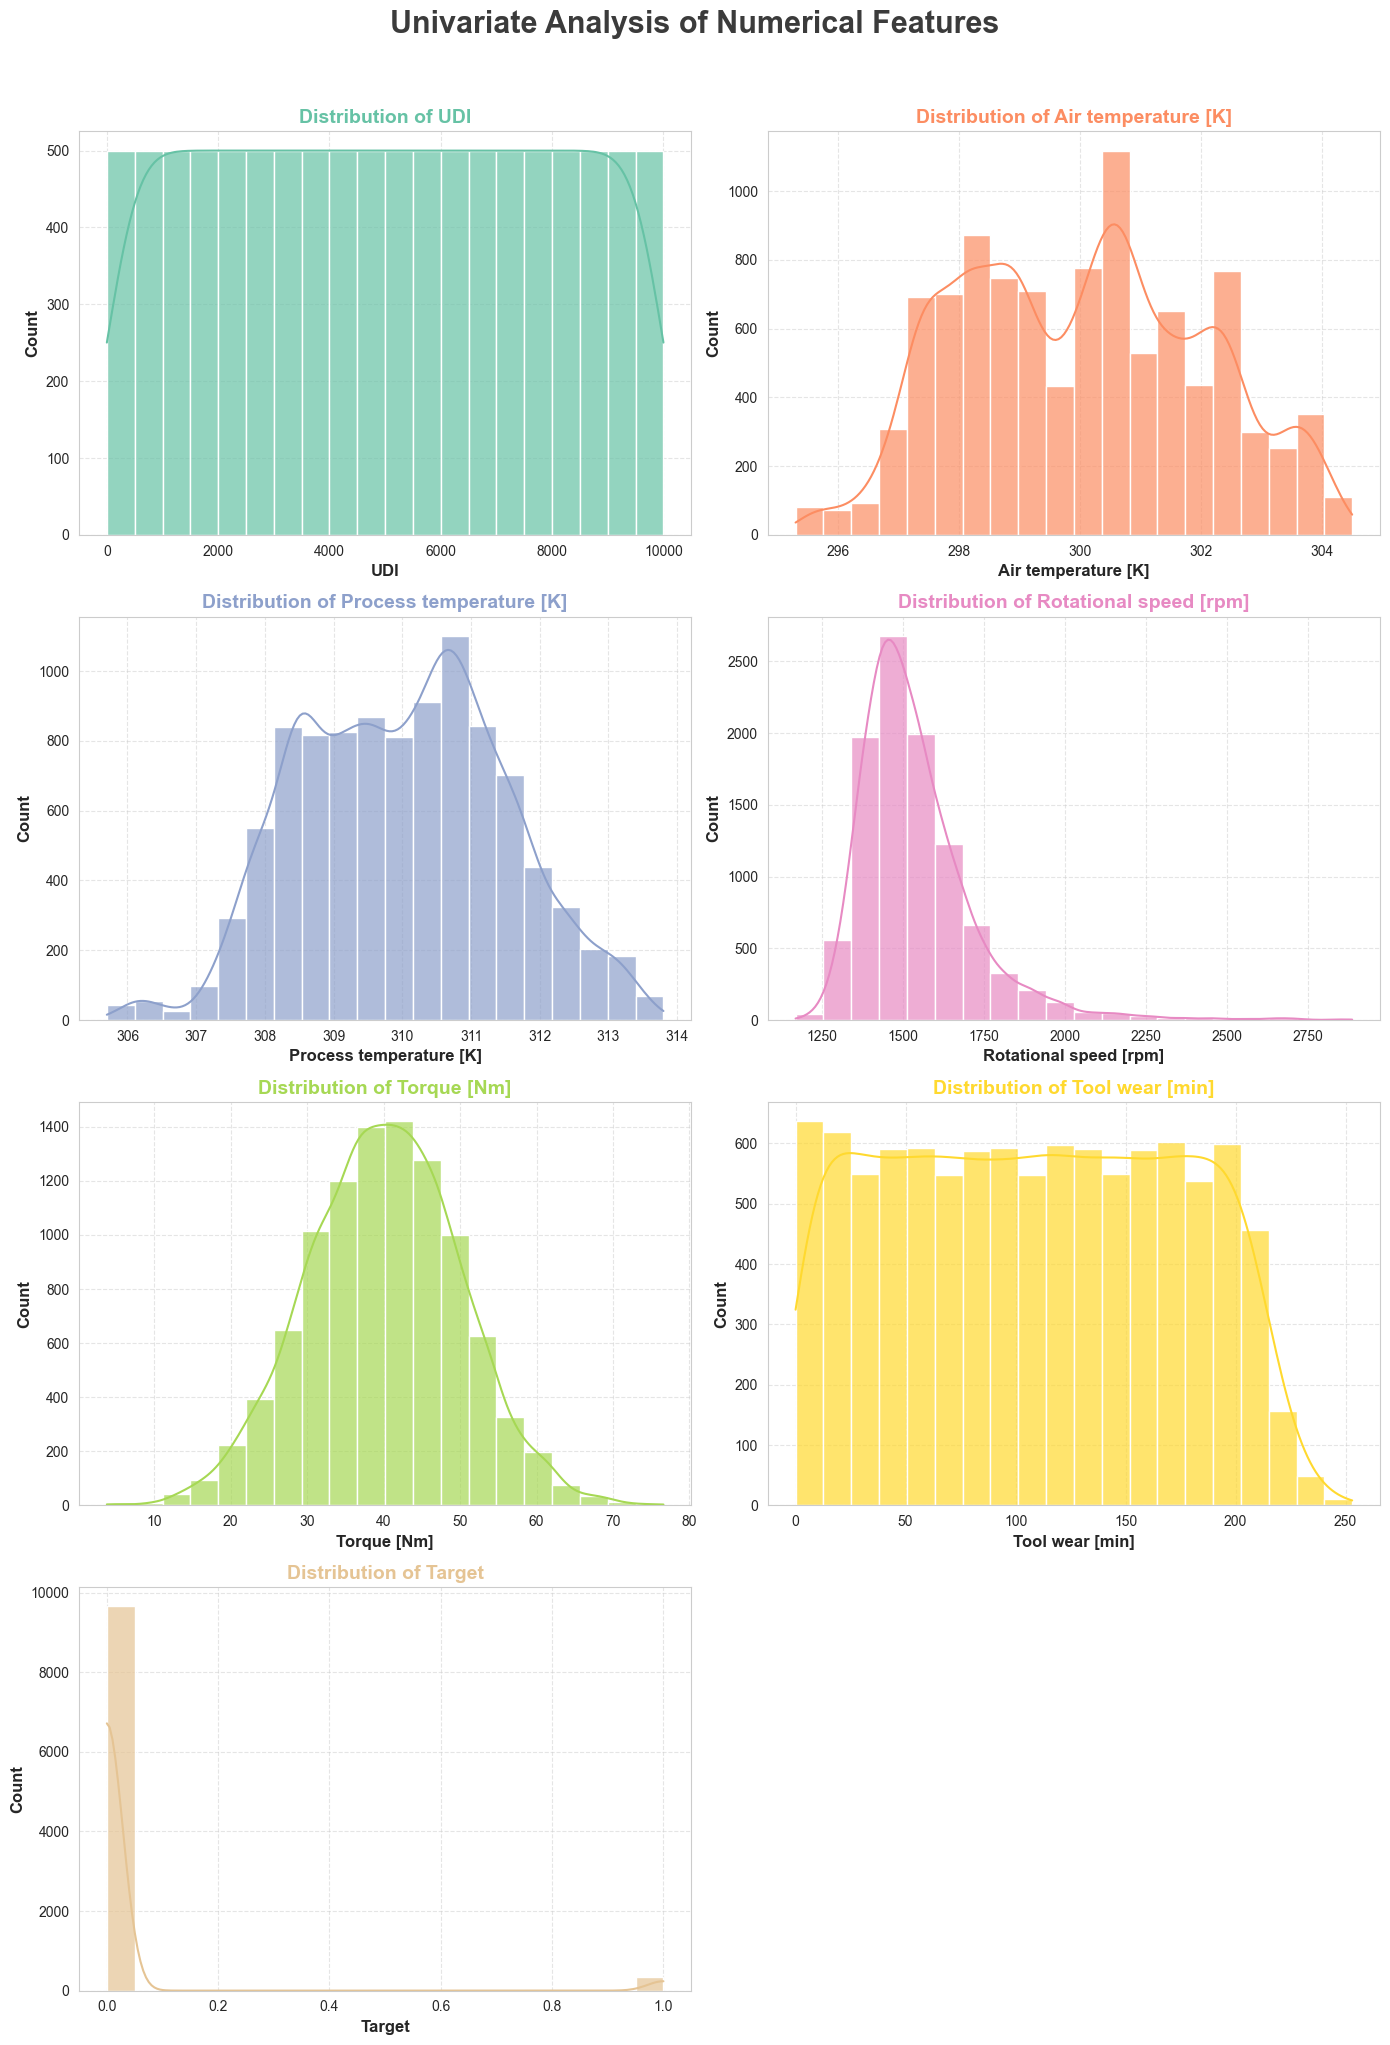

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Assume numerical_features is your list of numerical column names
num_features = len(numerical_features)
rows = math.ceil(num_features / 2)
cols = 2

plt.figure(figsize=(14, 5*rows))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize=22, fontweight="bold", alpha=0.9, y=1.02)

# Choose a seaborn color palette
colors = sns.color_palette("Set2", num_features)

for i, feature in enumerate(numerical_features):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(df[feature], kde=True, color=colors[i], bins=20, alpha=0.7)
    plt.xlabel(feature, fontsize=12, fontweight='bold')
    plt.ylabel('Count', fontsize=12, fontweight='bold')
    plt.title(f'Distribution of {feature}', fontsize=14, fontweight='bold', color=colors[i])
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [199]:
categorical_features

['Product ID', 'Type', 'Failure Type']

/var/folders/wh/jg38bx7n26j18rtc0krlwtyh0000gn/T/ipykernel_18598/3601365571.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[feature], palette=palette)
/var/folders/wh/jg38bx7n26j18rtc0krlwtyh0000gn/T/ipykernel_18598/3601365571.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[feature], palette=palette)


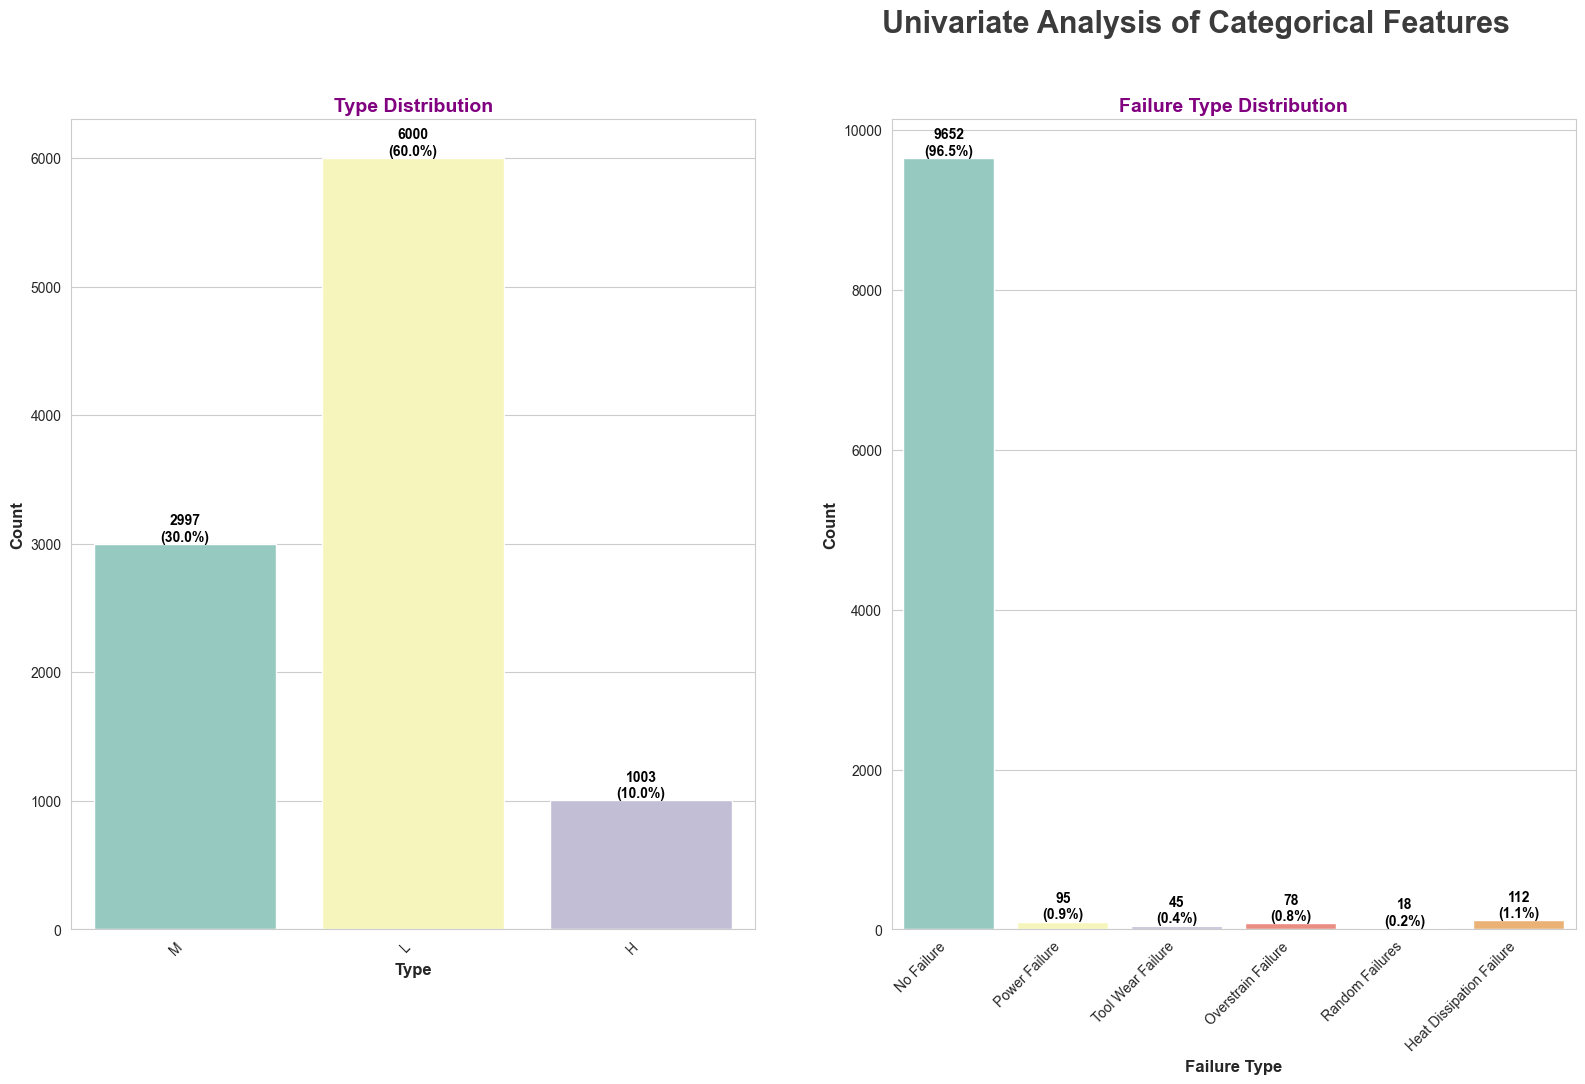

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Remove Product ID if present
if "Product ID" in categorical_features:
    categorical_features.remove("Product ID")

num_features = len(categorical_features)
cols = 3
rows = math.ceil(num_features / cols)

plt.figure(figsize=(10*cols, 10*rows))
plt.suptitle("Univariate Analysis of Categorical Features", 
             fontsize=22, fontweight="bold", alpha=0.9, y=1.03)

for i, feature in enumerate(categorical_features):
    plt.subplot(rows, cols, i + 1)
    
    # Generate a palette dynamically based on number of unique categories
    unique_cats = df[feature].nunique()
    palette = sns.color_palette("Set3", unique_cats)
    
    ax = sns.countplot(x=df[feature], palette=palette)
    plt.xlabel(feature, fontsize=12, fontweight='bold')
    plt.ylabel('Count', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.title(f'{feature} Distribution', fontsize=14, fontweight='bold', color='purple')
    
    # Annotate counts and percentages
    total = len(df[feature])
    for p in ax.patches:
        count = int(p.get_height())
        percentage = count / total * 100
        ax.annotate(f'{count}\n({percentage:.1f}%)',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Adjust spacing
plt.subplots_adjust(top=0.92, hspace=0.4)
plt.show()


In [201]:
discreate_features = [features for features in numerical_features if len(df[features].unique())<= 25]
continuous_features = [features for features in numerical_features if len(df[features].unique() > 25)]

print("we have {} discreate features : {}" .format(len(discreate_features) , discreate_features))
print("we have {} continuous features : {}" .format(len(continuous_features) , continuous_features))

we have 1 discreate features : ['Target']
we have 7 continuous features : ['UDI', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']


In [202]:
continuous_features

['UDI',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target']

/var/folders/wh/jg38bx7n26j18rtc0krlwtyh0000gn/T/ipykernel_18598/2784764359.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Target', y=feature, palette=clr, ax=ax[i, 0])
/var/folders/wh/jg38bx7n26j18rtc0krlwtyh0000gn/T/ipykernel_18598/2784764359.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Target', y=feature, palette=clr, ax=ax[i, 0])
/var/folders/wh/jg38bx7n26j18rtc0krlwtyh0000gn/T/ipykernel_18598/2784764359.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Target', y=feature, palette=clr,

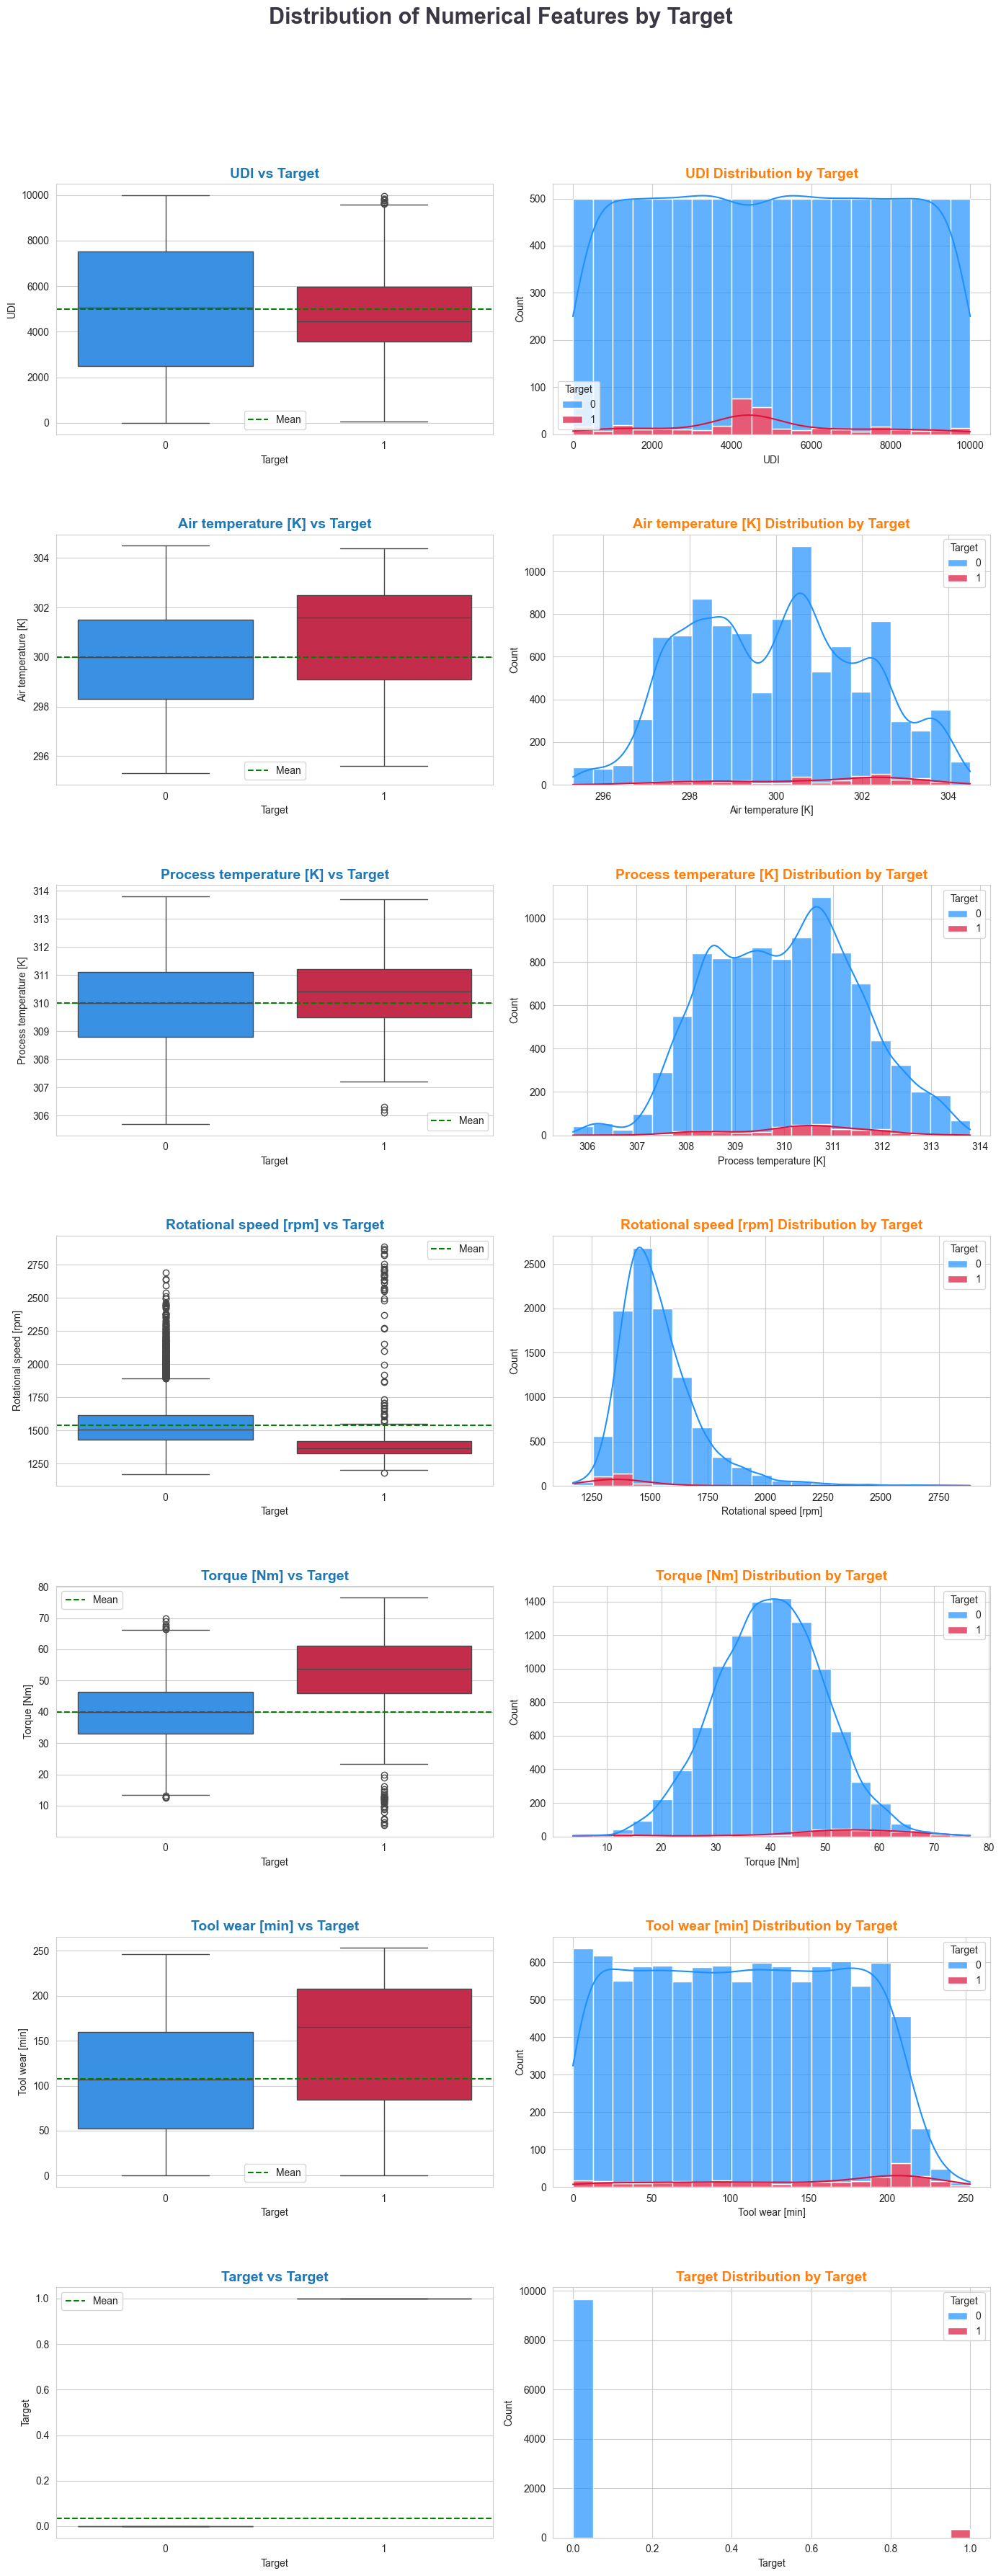

In [203]:
clr = ['#1E90FF', '#DC143C']  # colors for Target 0 and 1

num_features = len(continuous_features)
cols = 2  # Boxplot and Histogram side by side
rows = num_features  # Each feature gets one row

fig, ax = plt.subplots(rows, cols, figsize=(14, 5*rows))
fig.suptitle("Distribution of Numerical Features by Target", 
             color='#3C3744', fontsize=22, fontweight='bold', ha='center', y=1.02)

for i, feature in enumerate(continuous_features):
    # Boxplot
    sns.boxplot(data=df, x='Target', y=feature, palette=clr, ax=ax[i, 0])
    ax[i, 0].set_title(f'{feature} vs Target', fontsize=14, fontweight='bold', color='#1f77b4')
    ax[i, 0].axhline(df[feature].mean(), color='green', linestyle='--', label='Mean')
    ax[i, 0].legend()
    
    # Histogram + KDE
    sns.histplot(data=df, x=feature, hue='Target', bins=20, kde=True, 
                 multiple='stack', palette=clr, alpha=0.7, ax=ax[i, 1])
    ax[i, 1].set_title(f'{feature} Distribution by Target', fontsize=14, fontweight='bold', color='#ff7f0e')

plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.4)
plt.show()


/var/folders/wh/jg38bx7n26j18rtc0krlwtyh0000gn/T/ipykernel_18598/1339761471.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Failure Type', y=feature, palette=clr, ax=ax[i, 0])
/var/folders/wh/jg38bx7n26j18rtc0krlwtyh0000gn/T/ipykernel_18598/1339761471.py:17: UserWarning: 
The palette list has fewer values (2) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x='Failure Type', y=feature, palette=clr, ax=ax[i, 0])
/var/folders/wh/jg38bx7n26j18rtc0krlwtyh0000gn/T/ipykernel_18598/1339761471.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Failure Type', y=feature, palette=clr, ax=ax[i, 0])
/var/folders/wh/jg38bx7n

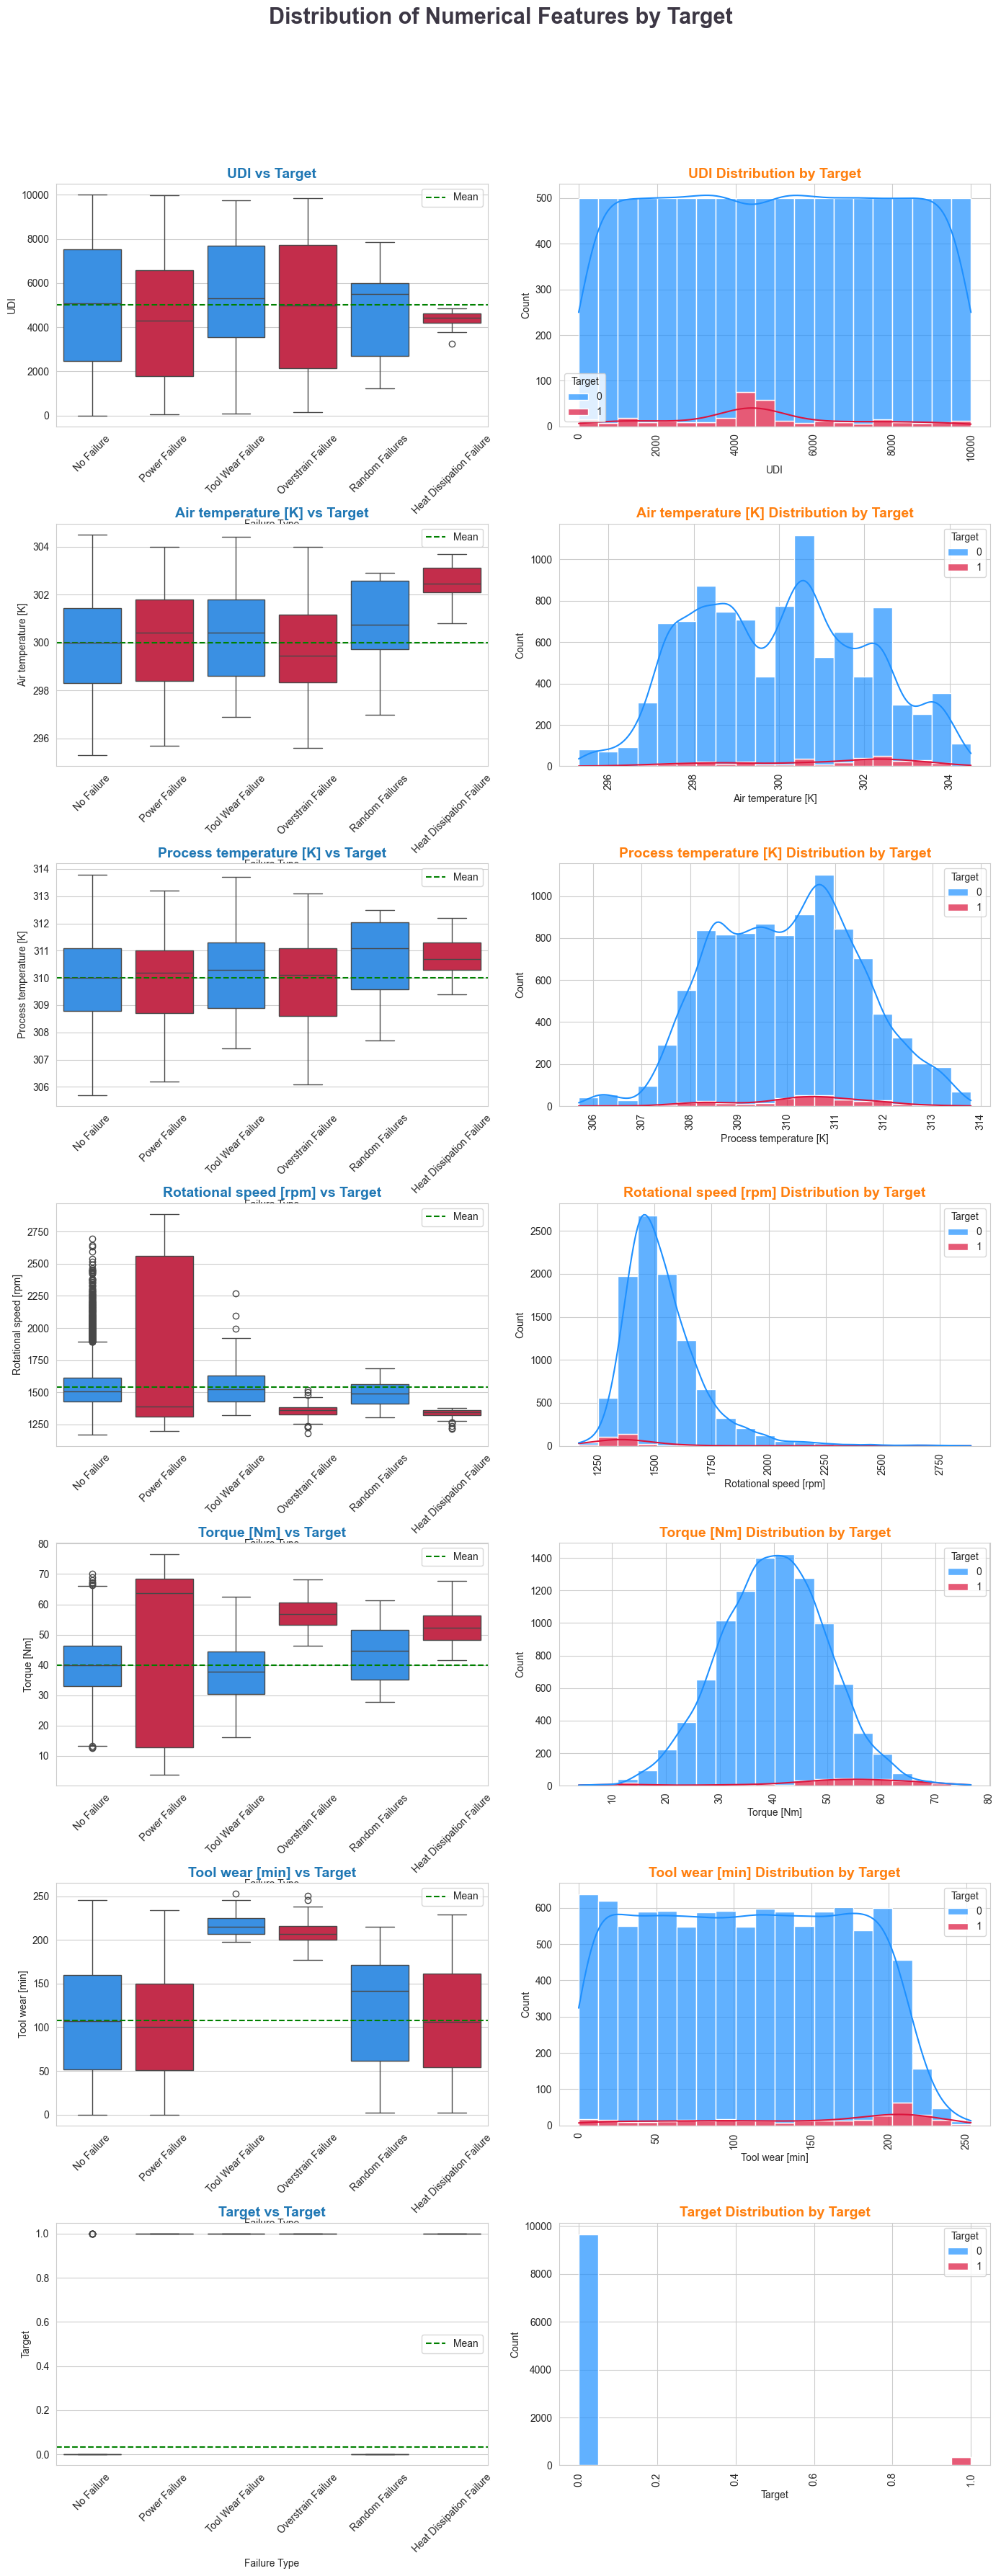

In [204]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

clr = ['#1E90FF', '#DC143C']  # colors for Target 0 and 1

num_features = len(continuous_features)
cols = 2  # Boxplot and Histogram side by side
rows = num_features  # Each feature gets one row

fig, ax = plt.subplots(rows, cols, figsize=(14, 5*rows))
fig.suptitle("Distribution of Numerical Features by Target", 
             color='#3C3744', fontsize=22, fontweight='bold', ha='center', y=1.02)

for i, feature in enumerate(continuous_features):
    # Boxplot
    sns.boxplot(data=df, x='Failure Type', y=feature, palette=clr, ax=ax[i, 0])
    ax[i, 0].set_title(f'{feature} vs Target', fontsize=14, fontweight='bold', color='#1f77b4')
    ax[i, 0].axhline(df[feature].mean(), color='green', linestyle='--', label='Mean')
    ax[i, 0].legend()
    ax[i, 0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

    # Histogram + KDE
    sns.histplot(data=df, x=feature, hue='Target', bins=20, kde=True, 
                 multiple='stack', palette=clr, alpha=0.7, ax=ax[i, 1])
    ax[i, 1].set_title(f'{feature} Distribution by Target', fontsize=14, fontweight='bold', color='#ff7f0e')
    ax[i, 1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.4)
plt.show()


/var/folders/wh/jg38bx7n26j18rtc0krlwtyh0000gn/T/ipykernel_18598/251469321.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Failure Type', y=feature, palette=palette, ax=ax[i, 0])
/var/folders/wh/jg38bx7n26j18rtc0krlwtyh0000gn/T/ipykernel_18598/251469321.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Failure Type', y=feature, palette=palette, ax=ax[i, 0])
/var/folders/wh/jg38bx7n26j18rtc0krlwtyh0000gn/T/ipykernel_18598/251469321.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Failure Type', 

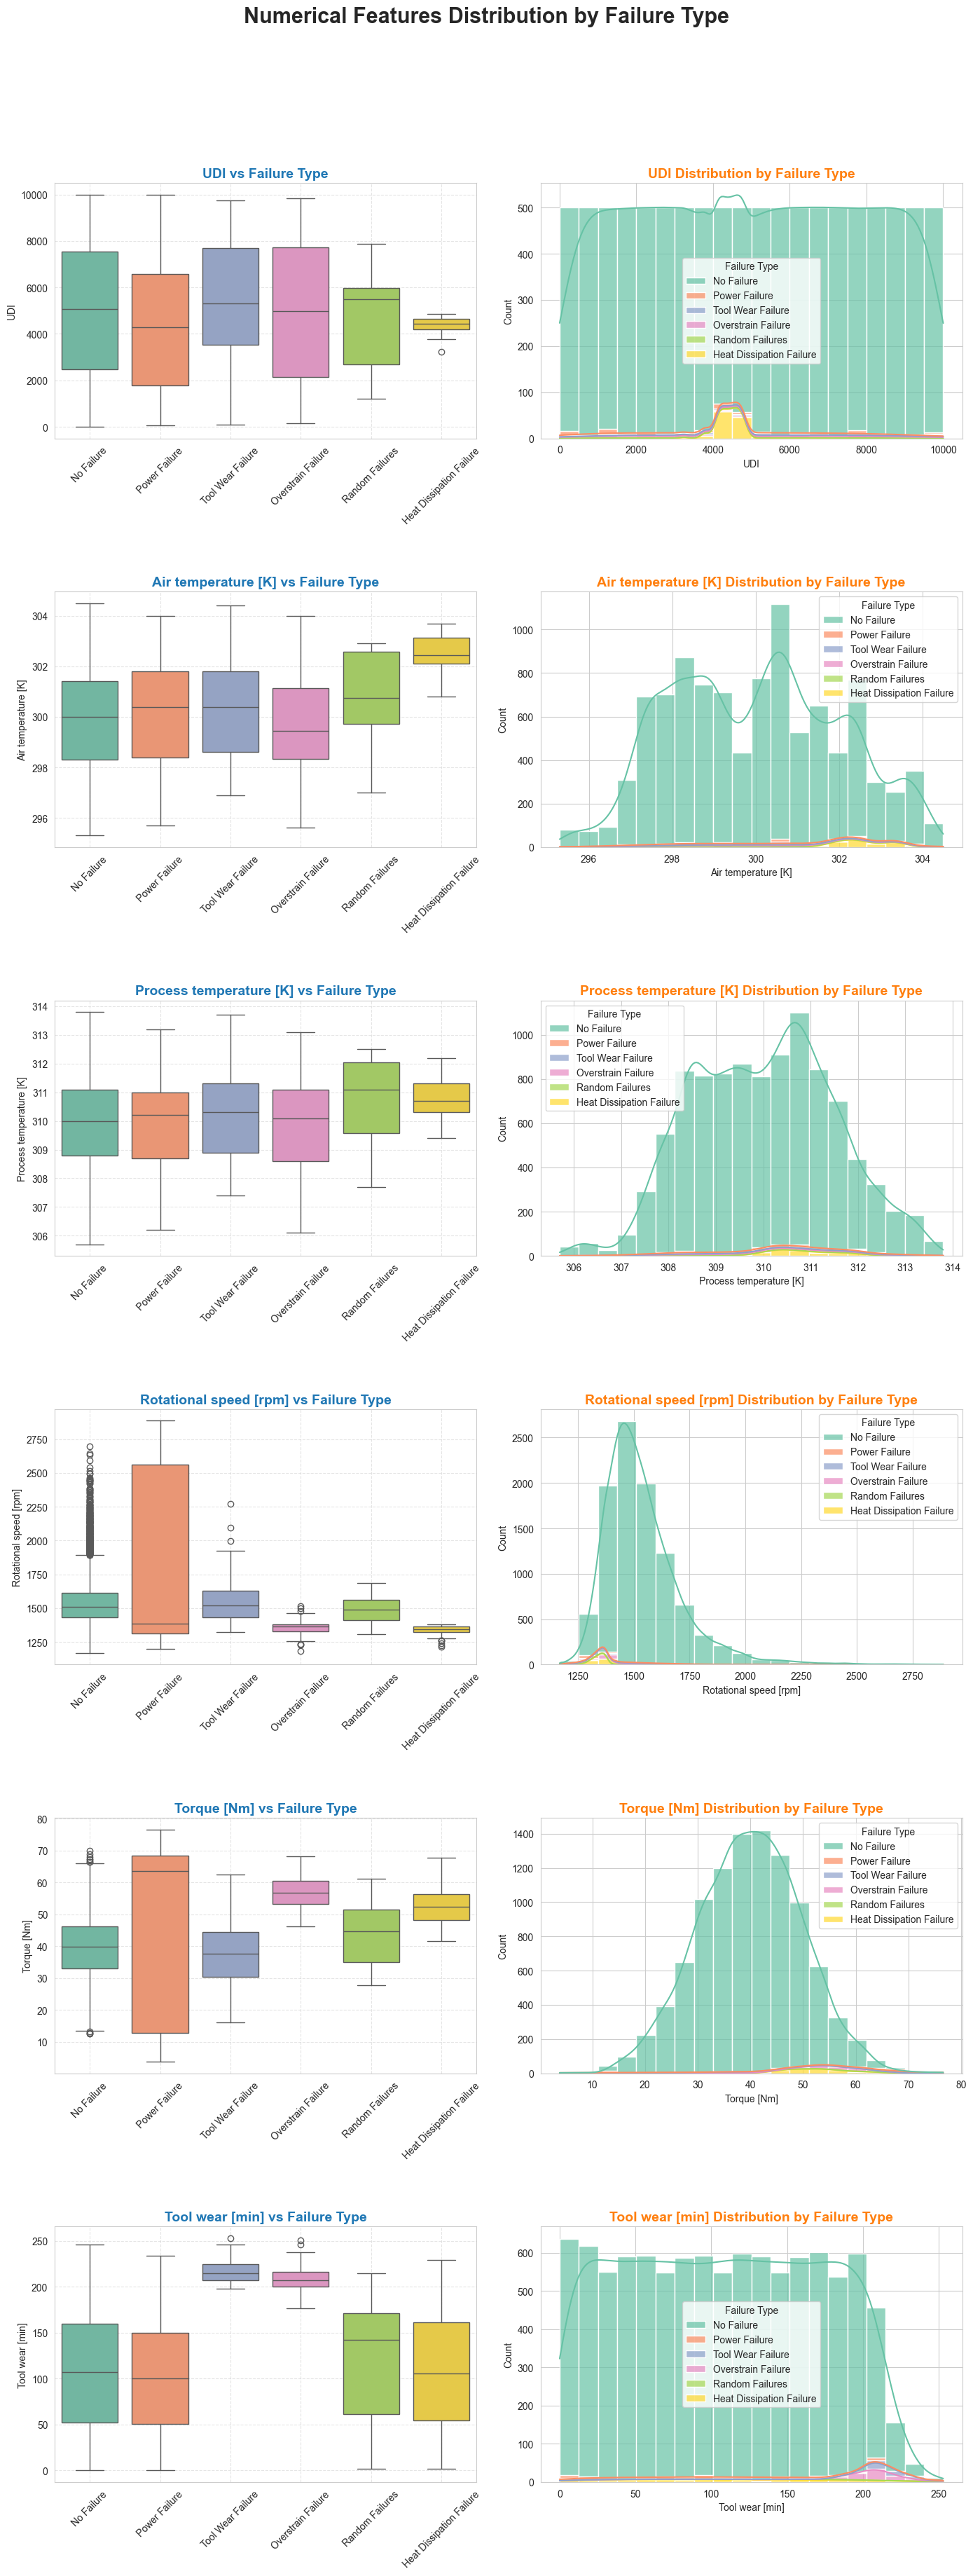

In [205]:
# Remove 'Target' from continuous_features if present
if 'Target' in continuous_features:
    continuous_features.remove('Target')

# Define a color palette for Failure Type
failure_types = df['Failure Type'].unique()
palette = sns.color_palette("Set2", len(failure_types))  # dynamic palette

num_features = len(continuous_features)
cols = 2  # boxplot + histogram side by side
rows = num_features

# Increase figure height to allow space between rows
fig, ax = plt.subplots(rows, cols, figsize=(14, 6*rows))
fig.suptitle("Numerical Features Distribution by Failure Type", 
             fontsize=22, fontweight='bold', ha='center', y=1.02)

for i, feature in enumerate(continuous_features):
    # Boxplot: shows spread for each failure type
    sns.boxplot(data=df, x='Failure Type', y=feature, palette=palette, ax=ax[i, 0])
    ax[i, 0].set_title(f'{feature} vs Failure Type', fontsize=14, fontweight='bold', color='#1f77b4')
    ax[i, 0].set_xlabel('')
    ax[i, 0].set_ylabel(feature)
    ax[i, 0].tick_params(axis='x', rotation=45)
    ax[i, 0].grid(True, linestyle='--', alpha=0.5)
    
    # Histogram + KDE: shows distribution for each failure type
    sns.histplot(data=df, x=feature, hue='Failure Type', bins=20, kde=True, 
                 multiple='stack', palette=palette, alpha=0.7, ax=ax[i, 1])
    ax[i, 1].set_title(f'{feature} Distribution by Failure Type', fontsize=14, fontweight='bold', color='#ff7f0e')
    ax[i, 1].set_xlabel(feature)
    ax[i, 1].set_ylabel('Count')

# Add extra vertical space between rows
plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.6)  # hspace controls vertical space
plt.show()


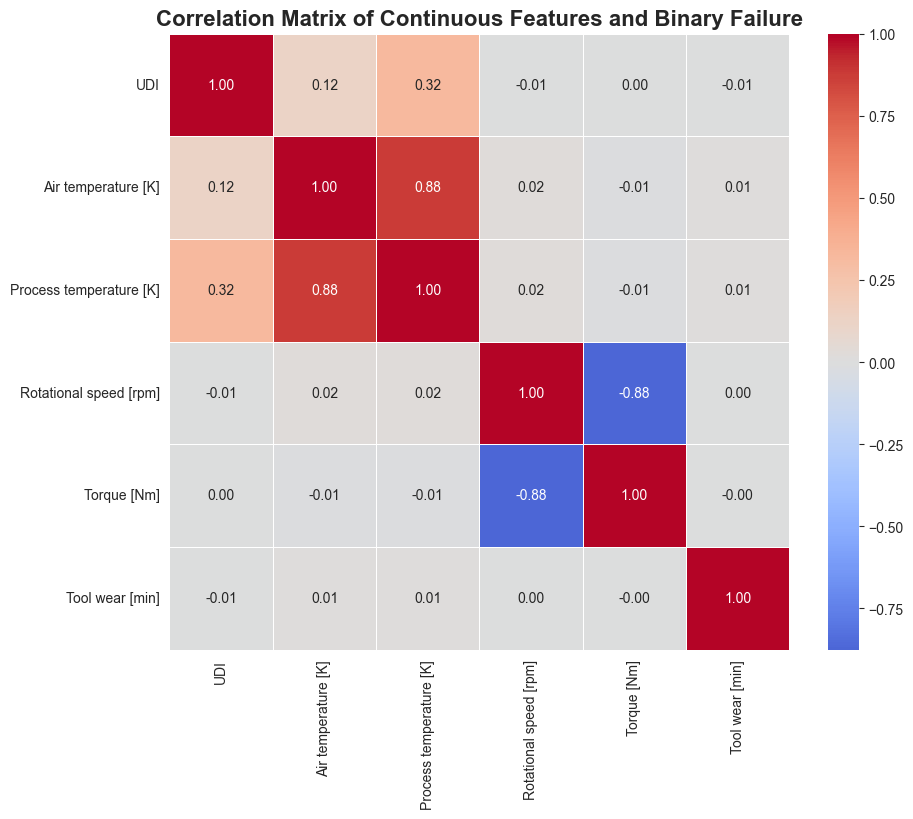

In [206]:
corr_features = continuous_features

# Compute correlation matrix
corr_matrix = df[corr_features].corr()

# Plot a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Correlation Matrix of Continuous Features and Binary Failure", fontsize=16, fontweight='bold')
plt.show()

In [207]:
numerical_features

['UDI',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target']

In [208]:
df[df['Target'] == 1].value_counts()

UDI   Product ID  Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  Failure Type            
51    L47230      L     298.9                309.1                    2861                    4.6          143              1       Power Failure               1
4832  L52011      L     303.5                312.0                    1366                    54.5         30               1       Heat Dissipation Failure    1
4977  L52156      L     303.7                312.7                    1359                    56.8         194              1       Overstrain Failure          1
4937  L52116      L     303.5                312.4                    1284                    70.6         94               1       Power Failure               1
4921  L52100      L     303.4                312.2                    1337                    69.4         52               1       Power Failure               1
                                 

In [209]:
df.groupby('Air temperature [K]')['Target'].value_counts(normalize = True).to_frame()*100

proportion
Air temperature [K] Target            
295.3               0       100.000000
295.4               0       100.000000
295.5               0       100.000000
295.6               0        97.368421
                    1         2.631579
...                                ...
304.2               0       100.000000
304.3               0       100.000000
304.4               0        85.714286
                    1        14.285714
304.5               0       100.000000

[173 rows x 1 columns]

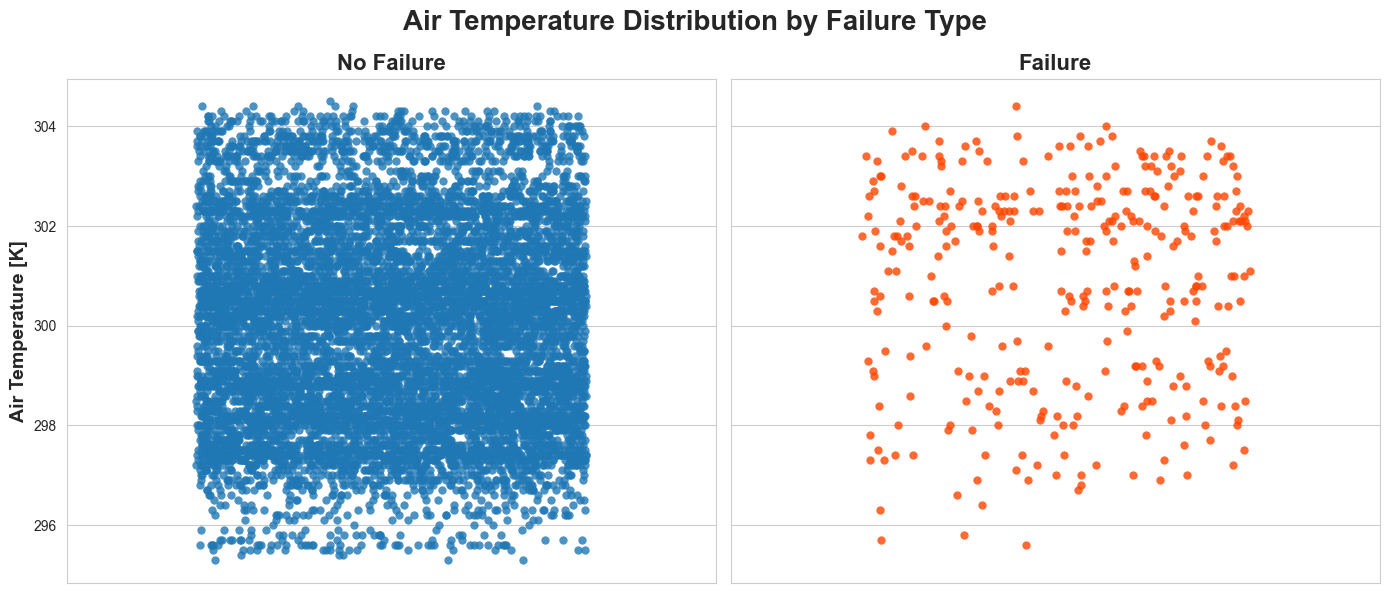

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Target is numeric
df['Target'] = df['Target'].astype(int)

# Split the data
df_no_failure = df[df['Target'] == 0]
df_failure = df[df['Target'] == 1]

fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)
sns.set_style("whitegrid")

# No Failure strip plot
sns.stripplot(
    data=df_no_failure,
    y='Air temperature [K]',
    color='#1f77b4',  # Vibrant blue
    size=6,
    jitter=0.3,
    alpha=0.8,
    ax=axes[0]
)
axes[0].set_title("No Failure", fontsize=16, fontweight='bold')
axes[0].set_xlabel("")
axes[0].set_ylabel("Air Temperature [K]", fontsize=14, fontweight='bold')

# Failure strip plot
sns.stripplot(
    data=df_failure,
    y='Air temperature [K]',
    color='#ff4500',  # Bright red
    size=6,
    jitter=0.3,
    alpha=0.8,
    ax=axes[1]
)
axes[1].set_title("Failure", fontsize=16, fontweight='bold')
axes[1].set_xlabel("")
axes[1].set_ylabel("")

plt.suptitle("Air Temperature Distribution by Failure Type", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


/var/folders/wh/jg38bx7n26j18rtc0krlwtyh0000gn/T/ipykernel_18598/486189610.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


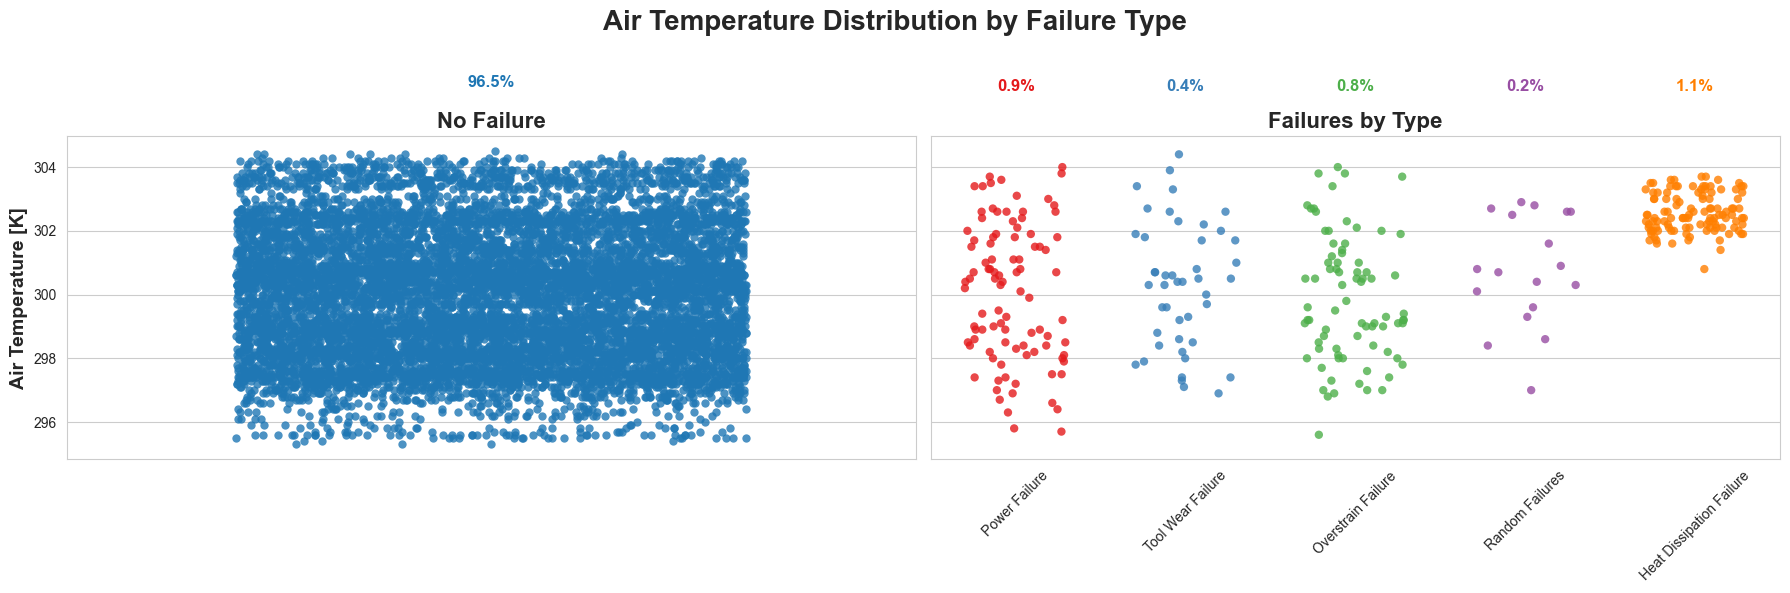

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Failure Type' is string
df['Failure Type'] = df['Failure Type'].astype(str)

# Split the data
df_no_failure = df[df['Failure Type'] == 'No Failure']
df_failures = df[df['Failure Type'] != 'No Failure']

fig, axes = plt.subplots(1, 2, figsize=(18,6), sharey=True)
sns.set_style("whitegrid")

# Left: No Failure
sns.stripplot(
    data=df_no_failure,
    y='Air temperature [K]',
    color='#1f77b4',  # Vibrant blue
    size=6,
    jitter=0.3,
    alpha=0.8,
    ax=axes[0]
)
axes[0].set_title("No Failure", fontsize=16, fontweight='bold')
axes[0].set_xlabel("")
axes[0].set_ylabel("Air Temperature [K]", fontsize=14, fontweight='bold')

# Annotate percentage
total = len(df)
count_no_failure = len(df_no_failure)
percent_no_failure = count_no_failure / total * 100
axes[0].text(0, df_no_failure['Air temperature [K]'].max() + 2, f'{percent_no_failure:.1f}%', 
             ha='center', fontsize=12, fontweight='bold', color='#1f77b4')

# Right: 5 Failure Types
failure_types = df_failures['Failure Type'].unique()
palette = sns.color_palette("Set1", n_colors=len(failure_types))

sns.stripplot(
    data=df_failures,
    y='Air temperature [K]',
    x='Failure Type',
    palette=palette,
    size=6,
    jitter=0.3,
    alpha=0.8,
    ax=axes[1]
)
axes[1].set_title("Failures by Type", fontsize=16, fontweight='bold')
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].tick_params(axis='x', rotation=45)

# Annotate percentages for each failure type
for i, f_type in enumerate(failure_types):
    count = len(df_failures[df_failures['Failure Type'] == f_type])
    percent = count / total * 100
    axes[1].text(i, df_failures['Air temperature [K]'].max() + 2, f'{percent:.1f}%', 
                 ha='center', fontsize=12, fontweight='bold', color=palette[i])

plt.suptitle("Air Temperature Distribution by Failure Type", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


In [212]:
df.groupby('Type')['Target'].value_counts(normalize=True).to_frame()*100

proportion
Type Target            
H    0        97.906281
     1         2.093719
L    0        96.083333
     1         3.916667
M    0        97.230564
     1         2.769436

/var/folders/wh/jg38bx7n26j18rtc0krlwtyh0000gn/T/ipykernel_18598/1864568364.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_no.index, y=counts_no.values, palette=[type_palette[t] for t in counts_no.index], ax=axes[0])
/var/folders/wh/jg38bx7n26j18rtc0krlwtyh0000gn/T/ipykernel_18598/1864568364.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_f.index, y=counts_f.values, palette=[type_palette[t] for t in counts_f.index], ax=axes[1])


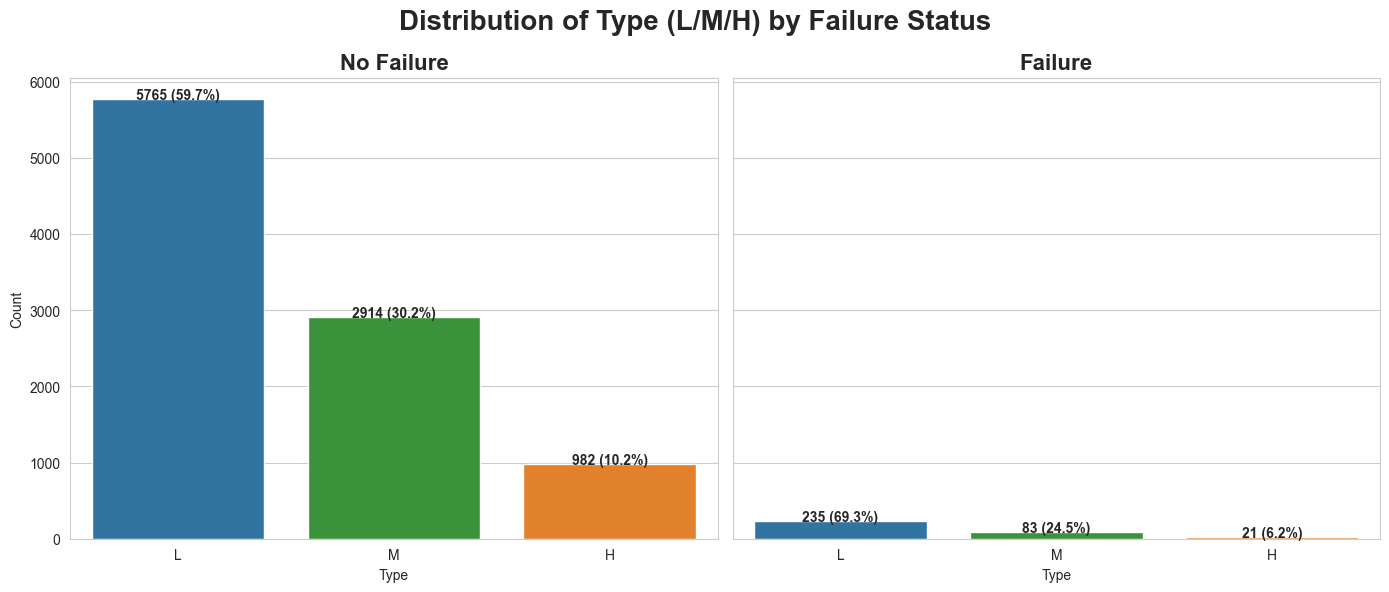

In [213]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure Target is numeric
df['Target'] = df['Target'].astype(int)

# Split data
df_no_failure = df[df['Target'] == 0]
df_failure = df[df['Target'] == 1]

# Colors for Type categories
type_palette = {'L':'#1f77b4', 'M':'#2ca02c', 'H':'#ff7f0e'}  # Blue, Green, Orange

fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)
sns.set_style("whitegrid")

# ---- Left: No Failure ----
counts_no = df_no_failure['Type'].value_counts().reindex(['L','M','H']).fillna(0)
sns.barplot(x=counts_no.index, y=counts_no.values, palette=[type_palette[t] for t in counts_no.index], ax=axes[0])
axes[0].set_title("No Failure", fontsize=16, fontweight='bold')
axes[0].set_xlabel("Type")
axes[0].set_ylabel("Count")
# Annotate percentage
total_no = counts_no.sum()
for i, val in enumerate(counts_no.values):
    axes[0].text(i, val + 0.1, f"{val} ({val/total_no*100:.1f}%)", ha='center', fontweight='bold')

# ---- Right: Failure ----
counts_f = df_failure['Type'].value_counts().reindex(['L','M','H']).fillna(0)
sns.barplot(x=counts_f.index, y=counts_f.values, palette=[type_palette[t] for t in counts_f.index], ax=axes[1])
axes[1].set_title("Failure", fontsize=16, fontweight='bold')
axes[1].set_xlabel("Type")
axes[1].set_ylabel("")
# Annotate percentage
total_f = counts_f.sum()
for i, val in enumerate(counts_f.values):
    axes[1].text(i, val + 0.1, f"{val} ({val/total_f*100:.1f}%)", ha='center', fontweight='bold')

plt.suptitle("Distribution of Type (L/M/H) by Failure Status", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


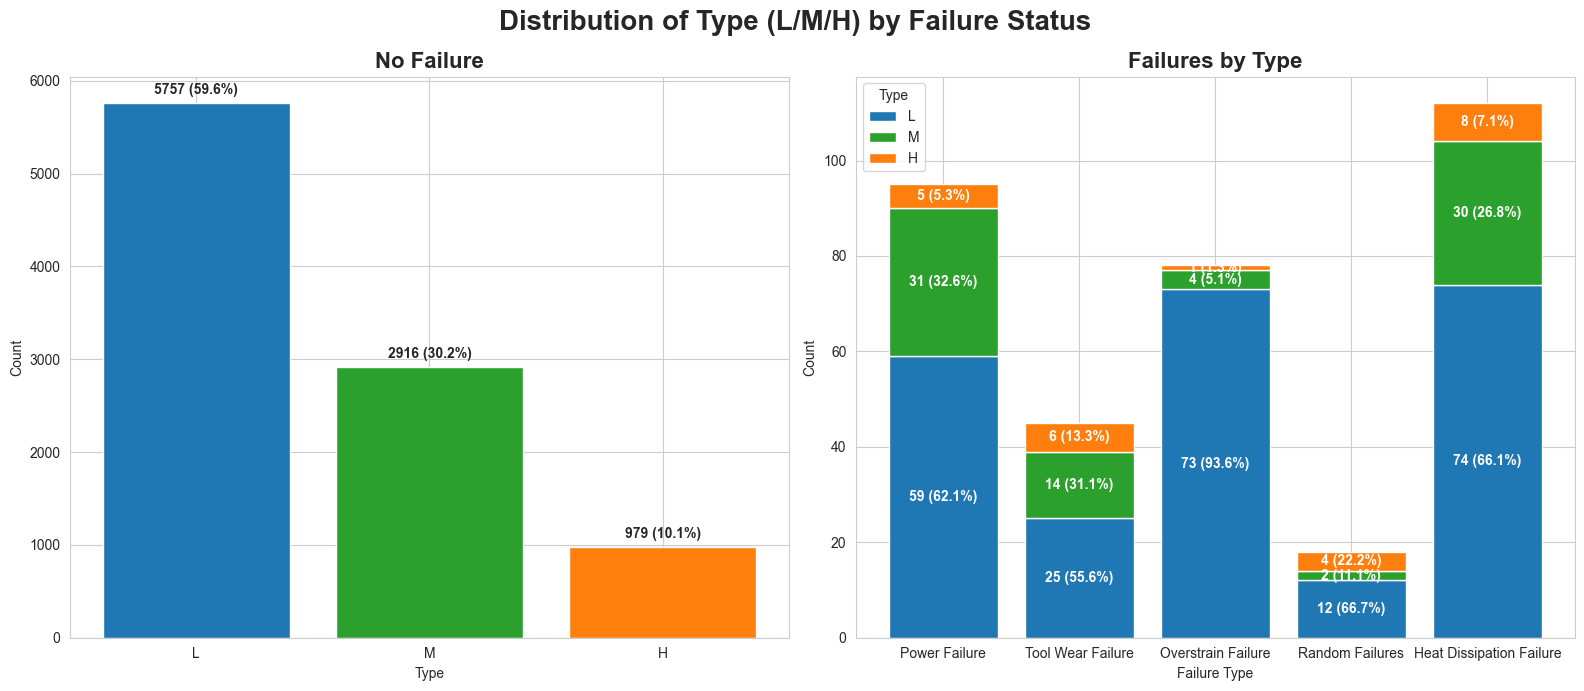

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure columns are string
df['Failure Type'] = df['Failure Type'].astype(str)
df['Type'] = df['Type'].astype(str)

# Split the data
df_no_failure = df[df['Failure Type'] == 'No Failure']
df_failures = df[df['Failure Type'] != 'No Failure']

# Colors for Type
type_palette = {'L':'#1f77b4', 'M':'#2ca02c', 'H':'#ff7f0e'}

fig, axes = plt.subplots(1, 2, figsize=(16,7), sharey=False)
sns.set_style("whitegrid")

# --- Left: No Failure (vertical) ---
type_counts = df_no_failure['Type'].value_counts().reindex(['L','M','H'])
axes[0].bar(type_counts.index, type_counts.values, color=[type_palette[t] for t in type_counts.index])
axes[0].set_title("No Failure", fontsize=16, fontweight='bold')
axes[0].set_ylabel("Count")
axes[0].set_xlabel("Type")

# Annotate percentages
total_no = len(df_no_failure)
for i, count in enumerate(type_counts.values):
    percent = count / total_no * 100
    axes[0].text(i, count + total_no*0.01, f'{count} ({percent:.1f}%)', ha='center', fontweight='bold')

# --- Right: Failures (vertical stacked) ---
failure_order = df_failures['Failure Type'].unique()
bottoms = [0]*len(failure_order)

for t in ['L','M','H']:
    counts = [len(df_failures[(df_failures['Failure Type']==f) & (df_failures['Type']==t)]) for f in failure_order]
    axes[1].bar(failure_order, counts, bottom=bottoms, color=type_palette[t], label=t)
    bottoms = [bottoms[i] + counts[i] for i in range(len(counts))]
    
    # Annotate percentages
    for i, count in enumerate(counts):
        if count > 0:
            total = sum([len(df_failures[(df_failures['Failure Type']==failure_order[i]) & (df_failures['Type']==tt)]) for tt in ['L','M','H']])
            percent = count / total * 100
            axes[1].text(i, bottoms[i] - count/2, f'{count} ({percent:.1f}%)', ha='center', va='center', color='white', fontweight='bold', fontsize=10)

axes[1].set_title("Failures by Type", fontsize=16, fontweight='bold')
axes[1].set_ylabel("Count")
axes[1].set_xlabel("Failure Type")
axes[1].legend(title='Type')

plt.suptitle("Distribution of Type (L/M/H) by Failure Status", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


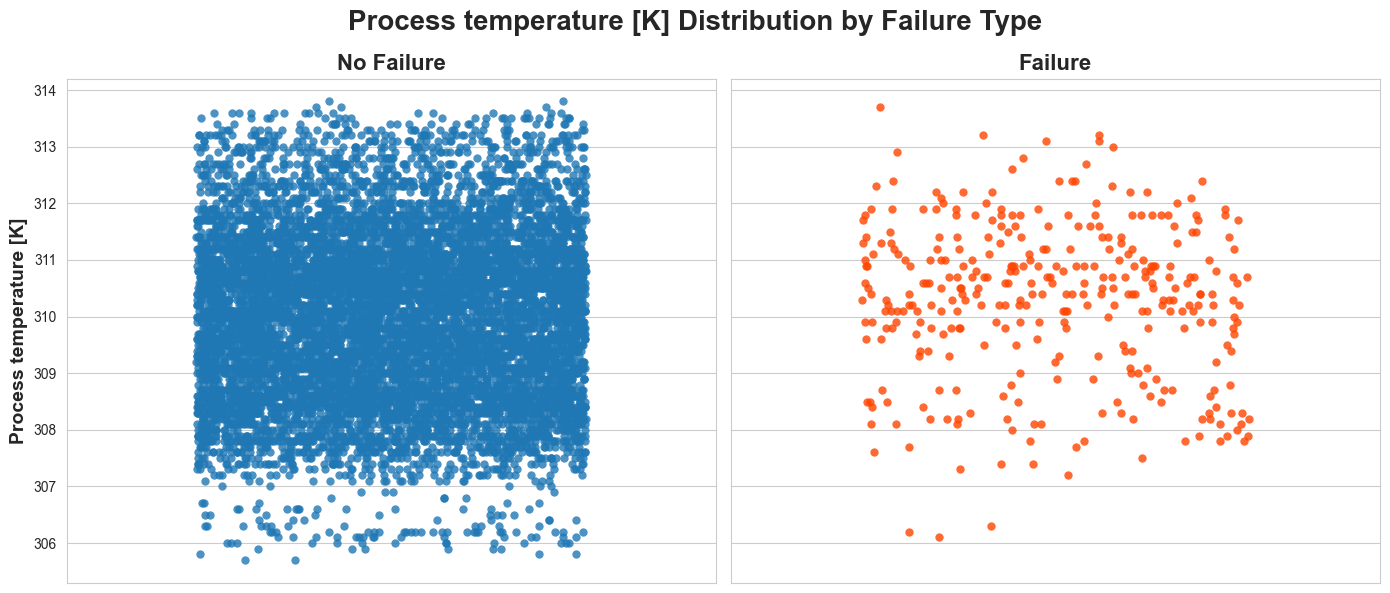

In [215]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Target is numeric
df['Target'] = df['Target'].astype(int)

# Split the data
df_no_failure = df[df['Target'] == 0]
df_failure = df[df['Target'] == 1]

fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)
sns.set_style("whitegrid")

# No Failure strip plot
sns.stripplot(
    data=df_no_failure,
    y='Process temperature [K]',
    color='#1f77b4',  # Vibrant blue
    size=6,
    jitter=0.3,
    alpha=0.8,
    ax=axes[0]
)
axes[0].set_title("No Failure", fontsize=16, fontweight='bold')
axes[0].set_xlabel("")
axes[0].set_ylabel("Process temperature [K]", fontsize=14, fontweight='bold')

# Failure strip plot
sns.stripplot(
    data=df_failure,
    y='Process temperature [K]',
    color='#ff4500',  # Bright red
    size=6,
    jitter=0.3,
    alpha=0.8,
    ax=axes[1]
)
axes[1].set_title("Failure", fontsize=16, fontweight='bold')
axes[1].set_xlabel("")
axes[1].set_ylabel("")

plt.suptitle("Process temperature [K] Distribution by Failure Type", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


/var/folders/wh/jg38bx7n26j18rtc0krlwtyh0000gn/T/ipykernel_18598/2635570875.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


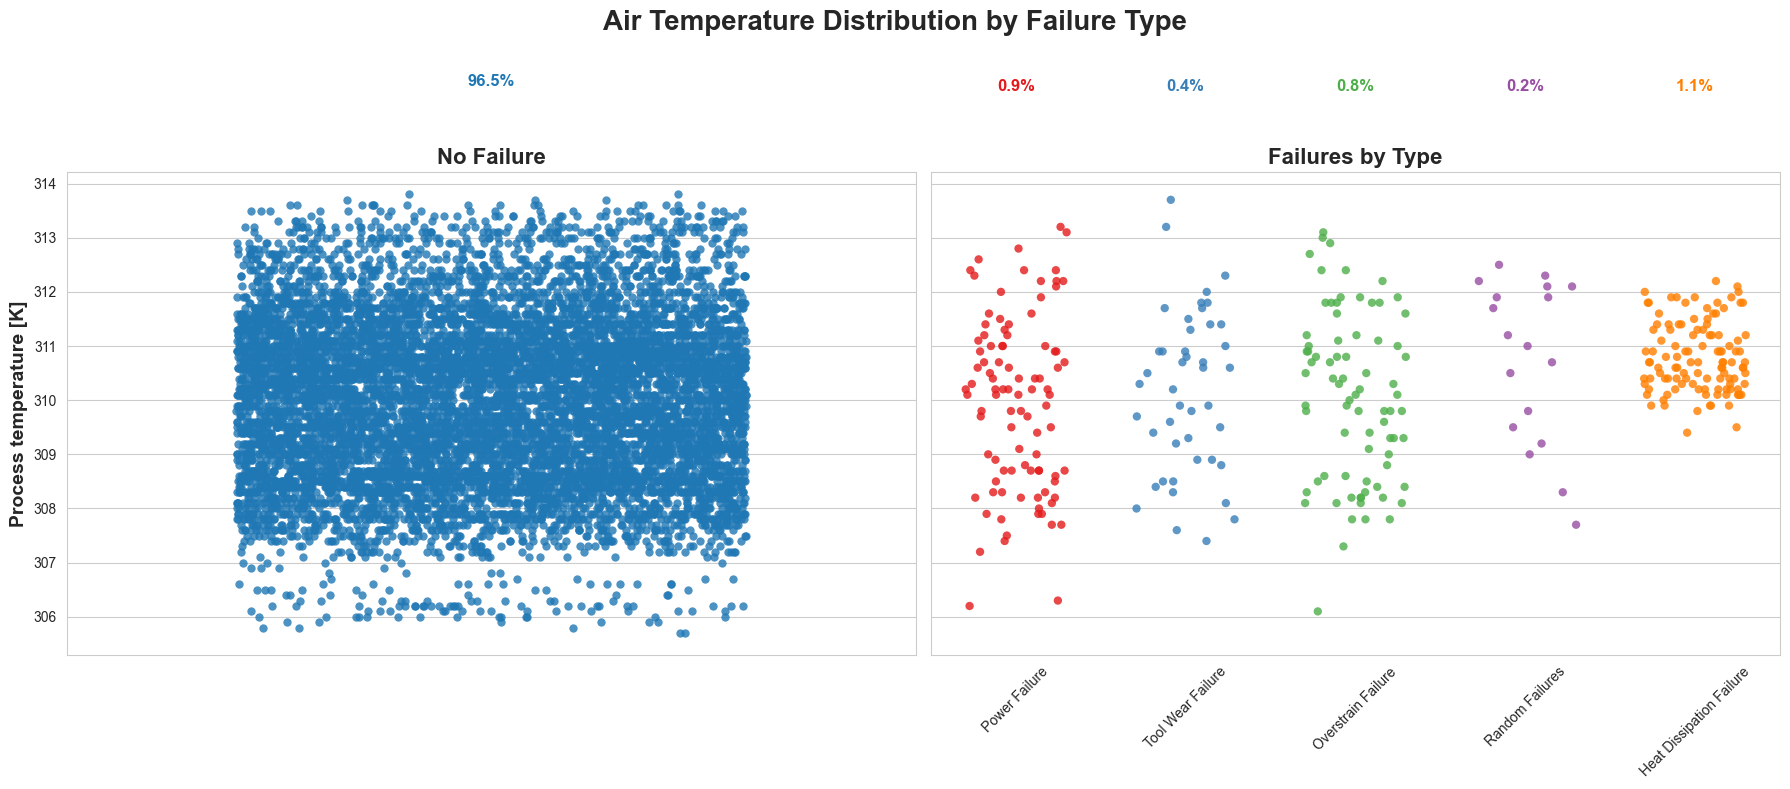

In [216]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Failure Type' is string
df['Failure Type'] = df['Failure Type'].astype(str)

# Split the data
df_no_failure = df[df['Failure Type'] == 'No Failure']
df_failures = df[df['Failure Type'] != 'No Failure']

fig, axes = plt.subplots(1, 2, figsize=(18,8), sharey=True)
sns.set_style("whitegrid")

# Left: No Failure
sns.stripplot(
    data=df_no_failure,
    y='Process temperature [K]',
    color='#1f77b4',  # Vibrant blue
    size=6,
    jitter=0.3,
    alpha=0.8,
    ax=axes[0]
)
axes[0].set_title("No Failure", fontsize=16, fontweight='bold')
axes[0].set_xlabel("")
axes[0].set_ylabel("Process temperature [K]", fontsize=14, fontweight='bold')

# Annotate percentage
total = len(df)
count_no_failure = len(df_no_failure)
percent_no_failure = count_no_failure / total * 100
axes[0].text(0, df_no_failure['Process temperature [K]'].max() + 2, f'{percent_no_failure:.1f}%', 
             ha='center', fontsize=12, fontweight='bold', color='#1f77b4')

# Right: 5 Failure Types
failure_types = df_failures['Failure Type'].unique()
palette = sns.color_palette("Set1", n_colors=len(failure_types))

sns.stripplot(
    data=df_failures,
    y='Process temperature [K]',
    x='Failure Type',
    palette=palette,
    size=6,
    jitter=0.3,
    alpha=0.8,
    ax=axes[1]
)
axes[1].set_title("Failures by Type", fontsize=16, fontweight='bold')
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].tick_params(axis='x', rotation=45)

# Annotate percentages for each failure type
for i, f_type in enumerate(failure_types):
    count = len(df_failures[df_failures['Failure Type'] == f_type])
    percent = count / total * 100
    axes[1].text(i, df_failures['Process temperature [K]'].max() + 2, f'{percent:.1f}%', 
                 ha='center', fontsize=12, fontweight='bold', color=palette[i])

plt.suptitle("Air Temperature Distribution by Failure Type", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


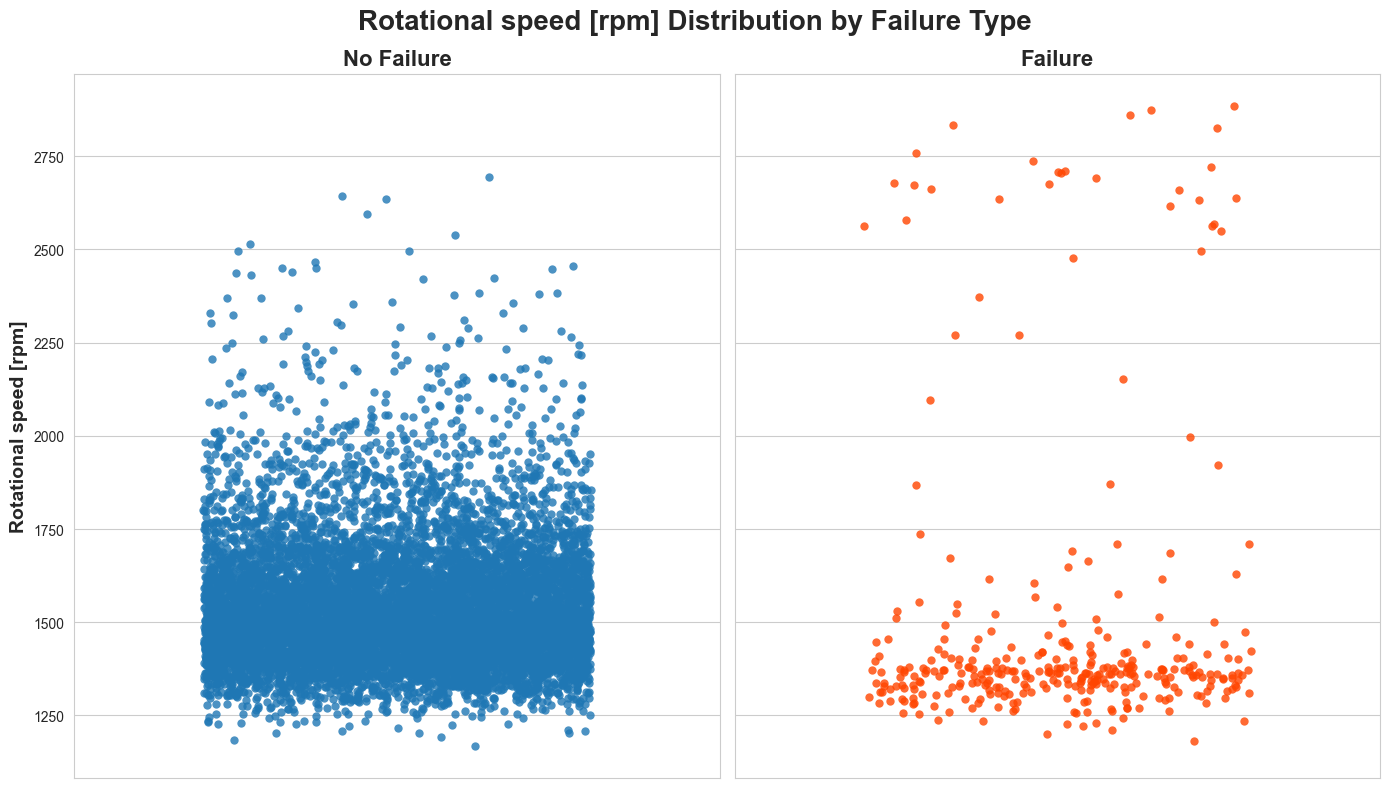

In [217]:
# Ensure Target is numeric
df['Target'] = df['Target'].astype(int)

# Split the data
df_no_failure = df[df['Target'] == 0]
df_failure = df[df['Target'] == 1]

fig, axes = plt.subplots(1, 2, figsize=(14,8), sharey=True)
sns.set_style("whitegrid")

# No Failure strip plot
sns.stripplot(
    data=df_no_failure,
    y='Rotational speed [rpm]',
    color='#1f77b4',  # Vibrant blue
    size=6,
    jitter=0.3,
    alpha=0.8,
    ax=axes[0]
)
axes[0].set_title("No Failure", fontsize=16, fontweight='bold')
axes[0].set_xlabel("")
axes[0].set_ylabel("Rotational speed [rpm]", fontsize=14, fontweight='bold')

# Failure strip plot
sns.stripplot(
    data=df_failure,
    y='Rotational speed [rpm]',
    color='#ff4500',  # Bright red
    size=6,
    jitter=0.3,
    alpha=0.8,
    ax=axes[1]
)
axes[1].set_title("Failure", fontsize=16, fontweight='bold')
axes[1].set_xlabel("")
axes[1].set_ylabel("")

plt.suptitle("Rotational speed [rpm] Distribution by Failure Type", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


/var/folders/wh/jg38bx7n26j18rtc0krlwtyh0000gn/T/ipykernel_18598/3990201719.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


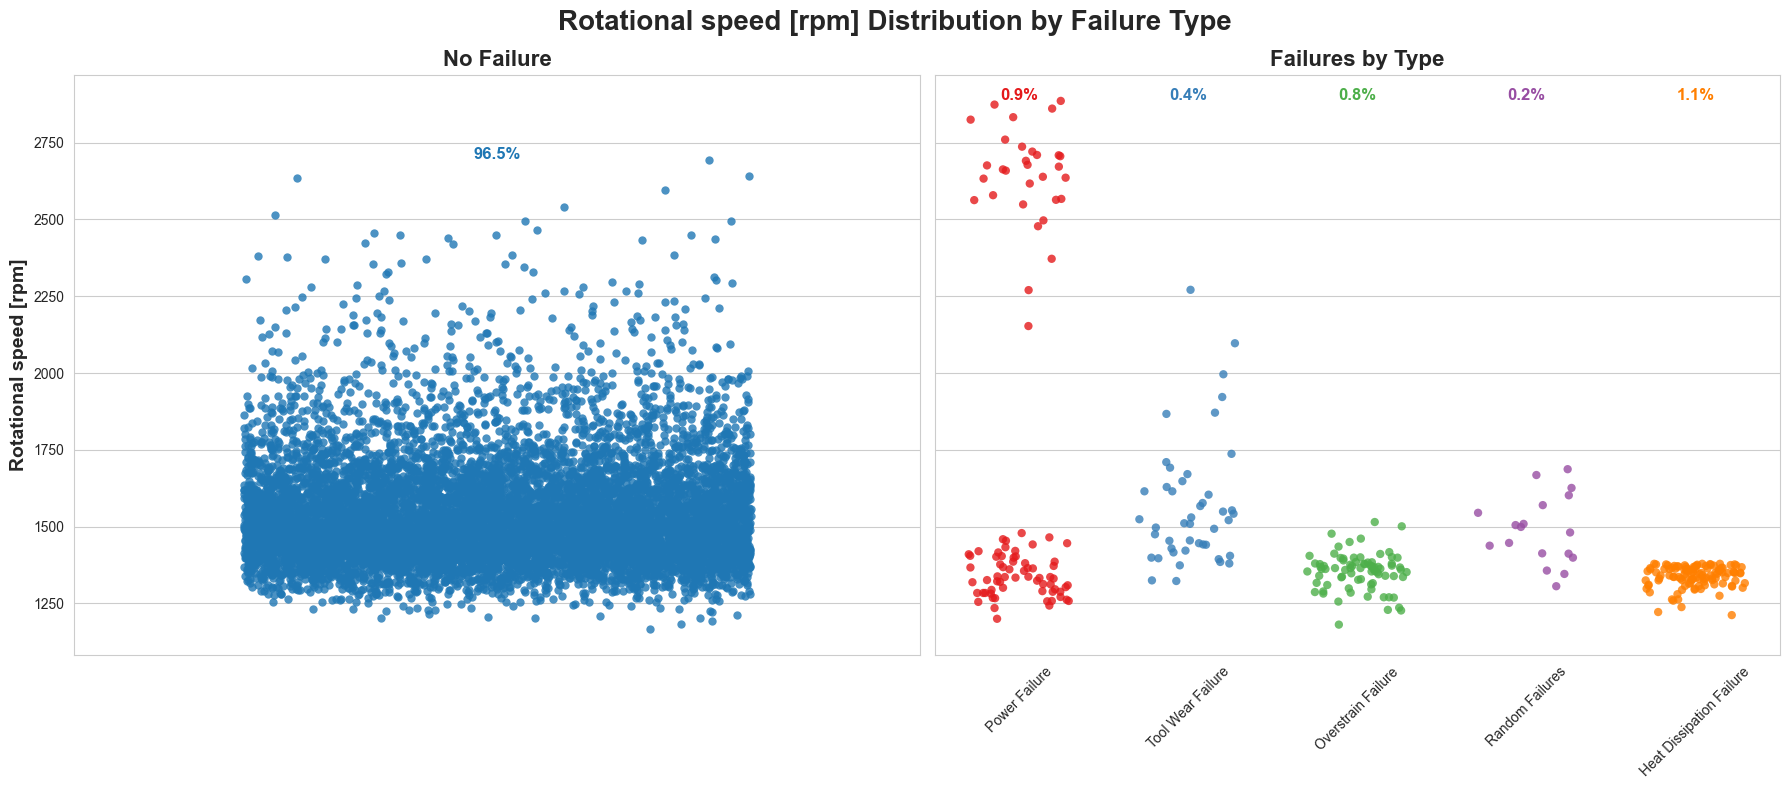

In [218]:
# Ensure 'Failure Type' is string
df['Failure Type'] = df['Failure Type'].astype(str)

# Split the data
df_no_failure = df[df['Failure Type'] == 'No Failure']
df_failures = df[df['Failure Type'] != 'No Failure']

fig, axes = plt.subplots(1, 2, figsize=(18,8), sharey=True)
sns.set_style("whitegrid")

# Left: No Failure
sns.stripplot(
    data=df_no_failure,
    y='Rotational speed [rpm]',
    color='#1f77b4',  # Vibrant blue
    size=6,
    jitter=0.3,
    alpha=0.8,
    ax=axes[0]
)
axes[0].set_title("No Failure", fontsize=16, fontweight='bold')
axes[0].set_xlabel("")
axes[0].set_ylabel("Rotational speed [rpm]", fontsize=14, fontweight='bold')

# Annotate percentage
total = len(df)
count_no_failure = len(df_no_failure)
percent_no_failure = count_no_failure / total * 100
axes[0].text(0, df_no_failure['Rotational speed [rpm]'].max() + 2, f'{percent_no_failure:.1f}%', 
             ha='center', fontsize=12, fontweight='bold', color='#1f77b4')

# Right: 5 Failure Types
failure_types = df_failures['Failure Type'].unique()
palette = sns.color_palette("Set1", n_colors=len(failure_types))

sns.stripplot(
    data=df_failures,
    y='Rotational speed [rpm]',
    x='Failure Type',
    palette=palette,
    size=6,
    jitter=0.3,
    alpha=0.8,
    ax=axes[1]
)
axes[1].set_title("Failures by Type", fontsize=16, fontweight='bold')
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].tick_params(axis='x', rotation=45)

# Annotate percentages for each failure type
for i, f_type in enumerate(failure_types):
    count = len(df_failures[df_failures['Failure Type'] == f_type])
    percent = count / total * 100
    axes[1].text(i, df_failures['Rotational speed [rpm]'].max() + 2, f'{percent:.1f}%', 
                 ha='center', fontsize=12, fontweight='bold', color=palette[i])

plt.suptitle("Rotational speed [rpm] Distribution by Failure Type", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


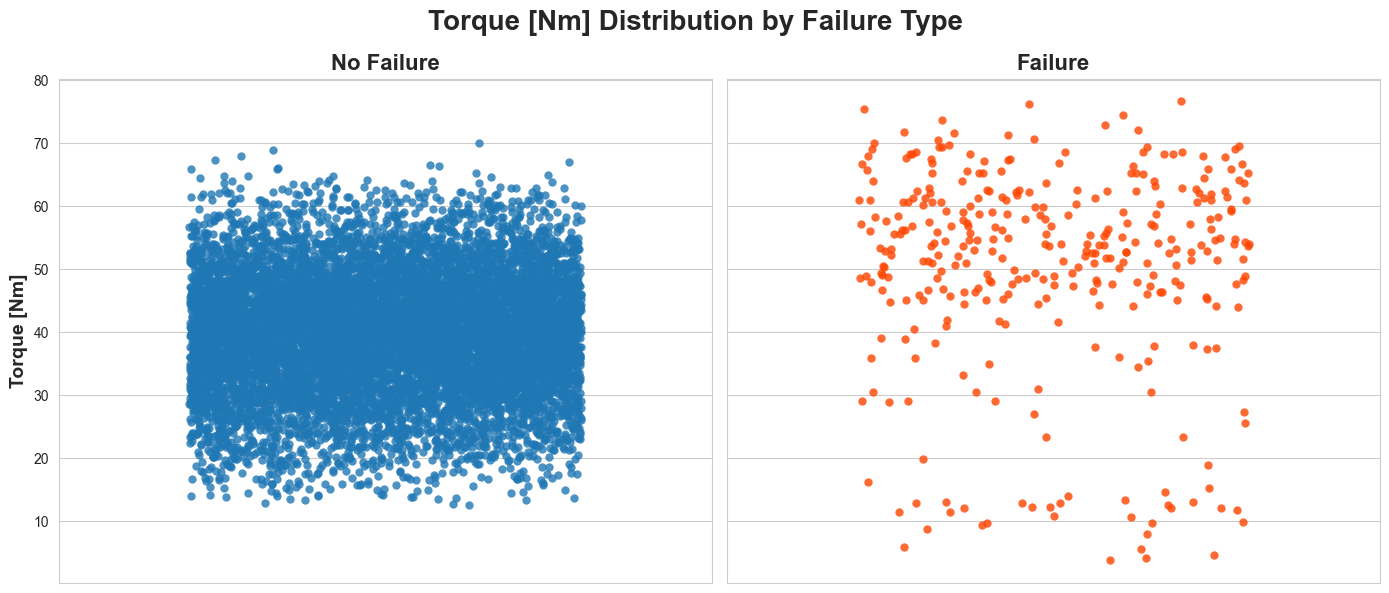

In [219]:
# Ensure Target is numeric
df['Target'] = df['Target'].astype(int)

# Split the data
df_no_failure = df[df['Target'] == 0]
df_failure = df[df['Target'] == 1]

fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)
sns.set_style("whitegrid")

# No Failure strip plot
sns.stripplot(
    data=df_no_failure,
    y='Torque [Nm]',
    color='#1f77b4',  # Vibrant blue
    size=6,
    jitter=0.3,
    alpha=0.8,
    ax=axes[0]
)
axes[0].set_title("No Failure", fontsize=16, fontweight='bold')
axes[0].set_xlabel("")
axes[0].set_ylabel("Torque [Nm]", fontsize=14, fontweight='bold')

# Failure strip plot
sns.stripplot(
    data=df_failure,
    y='Torque [Nm]',
    color='#ff4500',  # Bright red
    size=6,
    jitter=0.3,
    alpha=0.8,
    ax=axes[1]
)
axes[1].set_title("Failure", fontsize=16, fontweight='bold')
axes[1].set_xlabel("")
axes[1].set_ylabel("")

plt.suptitle("Torque [Nm] Distribution by Failure Type", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


/var/folders/wh/jg38bx7n26j18rtc0krlwtyh0000gn/T/ipykernel_18598/3717817283.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


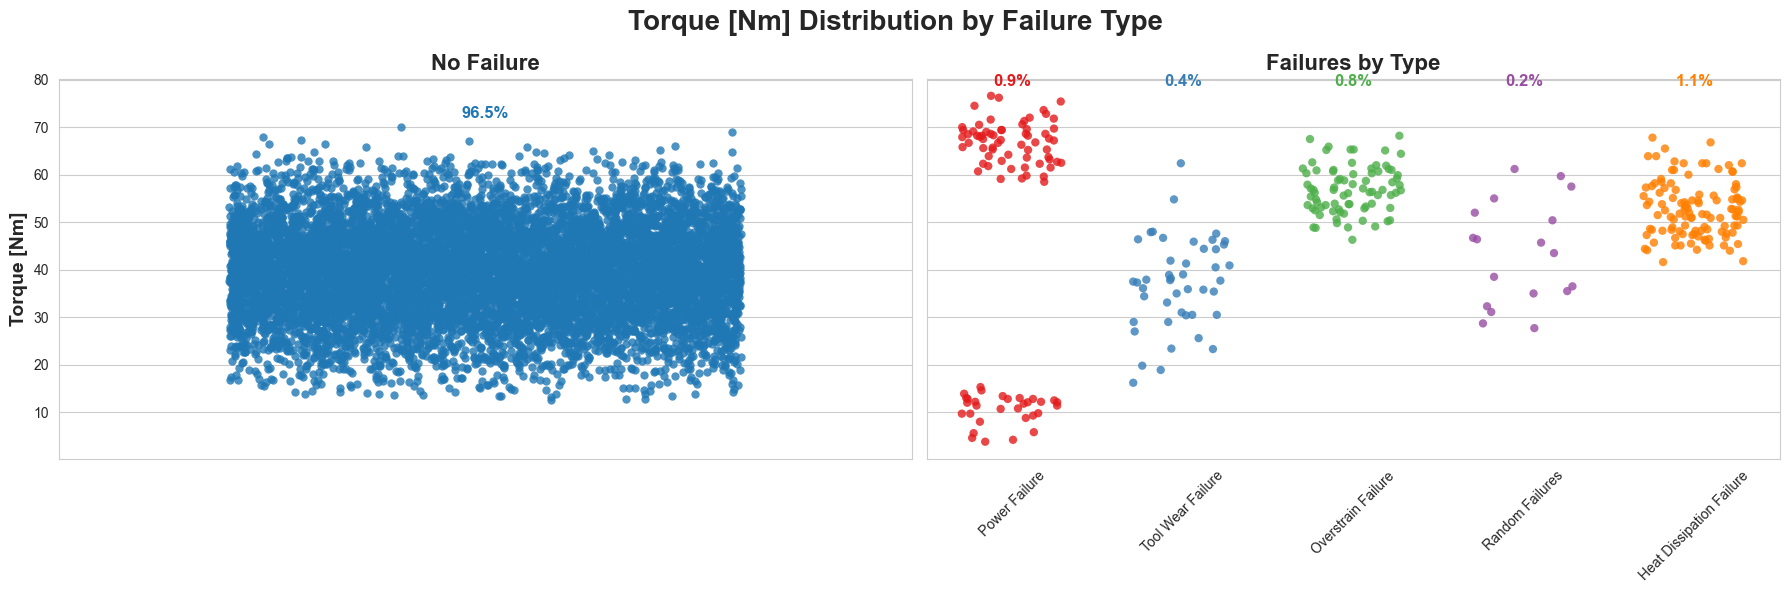

In [220]:
# Ensure 'Failure Type' is string
df['Failure Type'] = df['Failure Type'].astype(str)

# Split the data
df_no_failure = df[df['Failure Type'] == 'No Failure']
df_failures = df[df['Failure Type'] != 'No Failure']

fig, axes = plt.subplots(1, 2, figsize=(18,6), sharey=True)
sns.set_style("whitegrid")

# Left: No Failure
sns.stripplot(
    data=df_no_failure,
    y='Torque [Nm]',
    color='#1f77b4',  # Vibrant blue
    size=6,
    jitter=0.3,
    alpha=0.8,
    ax=axes[0]
)
axes[0].set_title("No Failure", fontsize=16, fontweight='bold')
axes[0].set_xlabel("")
axes[0].set_ylabel("Torque [Nm]", fontsize=14, fontweight='bold')

# Annotate percentage
total = len(df)
count_no_failure = len(df_no_failure)
percent_no_failure = count_no_failure / total * 100
axes[0].text(0, df_no_failure['Torque [Nm]'].max() + 2, f'{percent_no_failure:.1f}%', 
             ha='center', fontsize=12, fontweight='bold', color='#1f77b4')

# Right: 5 Failure Types
failure_types = df_failures['Failure Type'].unique()
palette = sns.color_palette("Set1", n_colors=len(failure_types))

sns.stripplot(
    data=df_failures,
    y='Torque [Nm]',
    x='Failure Type',
    palette=palette,
    size=6,
    jitter=0.3,
    alpha=0.8,
    ax=axes[1]
)
axes[1].set_title("Failures by Type", fontsize=16, fontweight='bold')
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].tick_params(axis='x', rotation=45)

# Annotate percentages for each failure type
for i, f_type in enumerate(failure_types):
    count = len(df_failures[df_failures['Failure Type'] == f_type])
    percent = count / total * 100
    axes[1].text(i, df_failures['Torque [Nm]'].max() + 2, f'{percent:.1f}%', 
                 ha='center', fontsize=12, fontweight='bold', color=palette[i])

plt.suptitle("Torque [Nm] Distribution by Failure Type", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


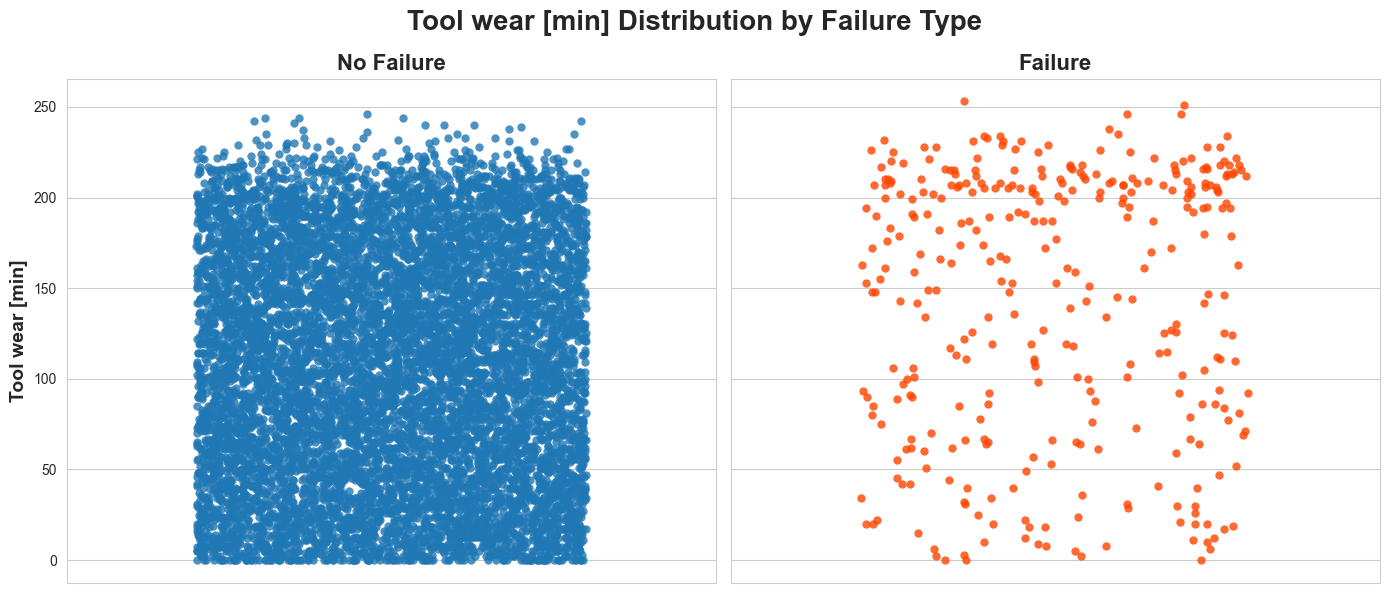

In [221]:
# Ensure Target is numeric
df['Target'] = df['Target'].astype(int)

# Split the data
df_no_failure = df[df['Target'] == 0]
df_failure = df[df['Target'] == 1]

fig, axes = plt.subplots(1, 2, figsize=(14,6), sharey=True)
sns.set_style("whitegrid")

# No Failure strip plot
sns.stripplot(
    data=df_no_failure,
    y='Tool wear [min]',
    color='#1f77b4',  # Vibrant blue
    size=6,
    jitter=0.3,
    alpha=0.8,
    ax=axes[0]
)
axes[0].set_title("No Failure", fontsize=16, fontweight='bold')
axes[0].set_xlabel("")
axes[0].set_ylabel("Tool wear [min]", fontsize=14, fontweight='bold')

# Failure strip plot
sns.stripplot(
    data=df_failure,
    y='Tool wear [min]',
    color='#ff4500',  # Bright red
    size=6,
    jitter=0.3,
    alpha=0.8,
    ax=axes[1]
)
axes[1].set_title("Failure", fontsize=16, fontweight='bold')
axes[1].set_xlabel("")
axes[1].set_ylabel("")

plt.suptitle("Tool wear [min] Distribution by Failure Type", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


/var/folders/wh/jg38bx7n26j18rtc0krlwtyh0000gn/T/ipykernel_18598/2318551146.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


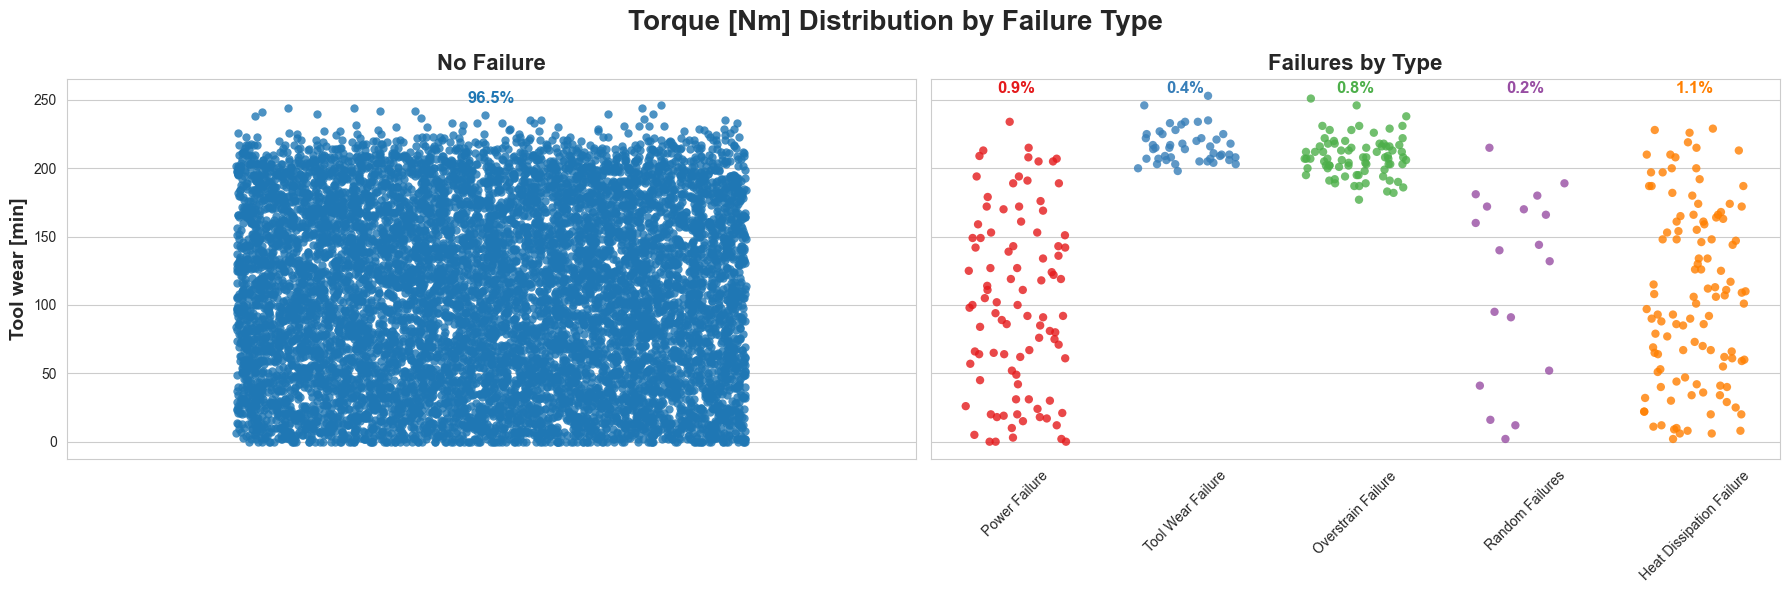

In [222]:
# Ensure 'Failure Type' is string
df['Failure Type'] = df['Failure Type'].astype(str)

# Split the data
df_no_failure = df[df['Failure Type'] == 'No Failure']
df_failures = df[df['Failure Type'] != 'No Failure']

fig, axes = plt.subplots(1, 2, figsize=(18,6), sharey=True)
sns.set_style("whitegrid")

# Left: No Failure
sns.stripplot(
    data=df_no_failure,
    y='Tool wear [min]',
    color='#1f77b4',  # Vibrant blue
    size=6,
    jitter=0.3,
    alpha=0.8,
    ax=axes[0]
)
axes[0].set_title("No Failure", fontsize=16, fontweight='bold')
axes[0].set_xlabel("")
axes[0].set_ylabel("Tool wear [min]", fontsize=14, fontweight='bold')

# Annotate percentage
total = len(df)
count_no_failure = len(df_no_failure)
percent_no_failure = count_no_failure / total * 100
axes[0].text(0, df_no_failure['Tool wear [min]'].max() + 2, f'{percent_no_failure:.1f}%', 
             ha='center', fontsize=12, fontweight='bold', color='#1f77b4')

# Right: 5 Failure Types
failure_types = df_failures['Failure Type'].unique()
palette = sns.color_palette("Set1", n_colors=len(failure_types))

sns.stripplot(
    data=df_failures,
    y='Tool wear [min]',
    x='Failure Type',
    palette=palette,
    size=6,
    jitter=0.3,
    alpha=0.8,
    ax=axes[1]
)
axes[1].set_title("Failures by Type", fontsize=16, fontweight='bold')
axes[1].set_xlabel("")
axes[1].set_ylabel("")
axes[1].tick_params(axis='x', rotation=45)

# Annotate percentages for each failure type
for i, f_type in enumerate(failure_types):
    count = len(df_failures[df_failures['Failure Type'] == f_type])
    percent = count / total * 100
    axes[1].text(i, df_failures['Tool wear [min]'].max() + 2, f'{percent:.1f}%', 
                 ha='center', fontsize=12, fontweight='bold', color=palette[i])

plt.suptitle("Torque [Nm] Distribution by Failure Type", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


/var/folders/wh/jg38bx7n26j18rtc0krlwtyh0000gn/T/ipykernel_18598/1441150274.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Failure Type', y=feature, palette='Set1', ax=ax[row_idx, col_idx])
/var/folders/wh/jg38bx7n26j18rtc0krlwtyh0000gn/T/ipykernel_18598/1441150274.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Failure Type', y=feature, palette='Set1', ax=ax[row_idx, col_idx])
/var/folders/wh/jg38bx7n26j18rtc0krlwtyh0000gn/T/ipykernel_18598/1441150274.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(da

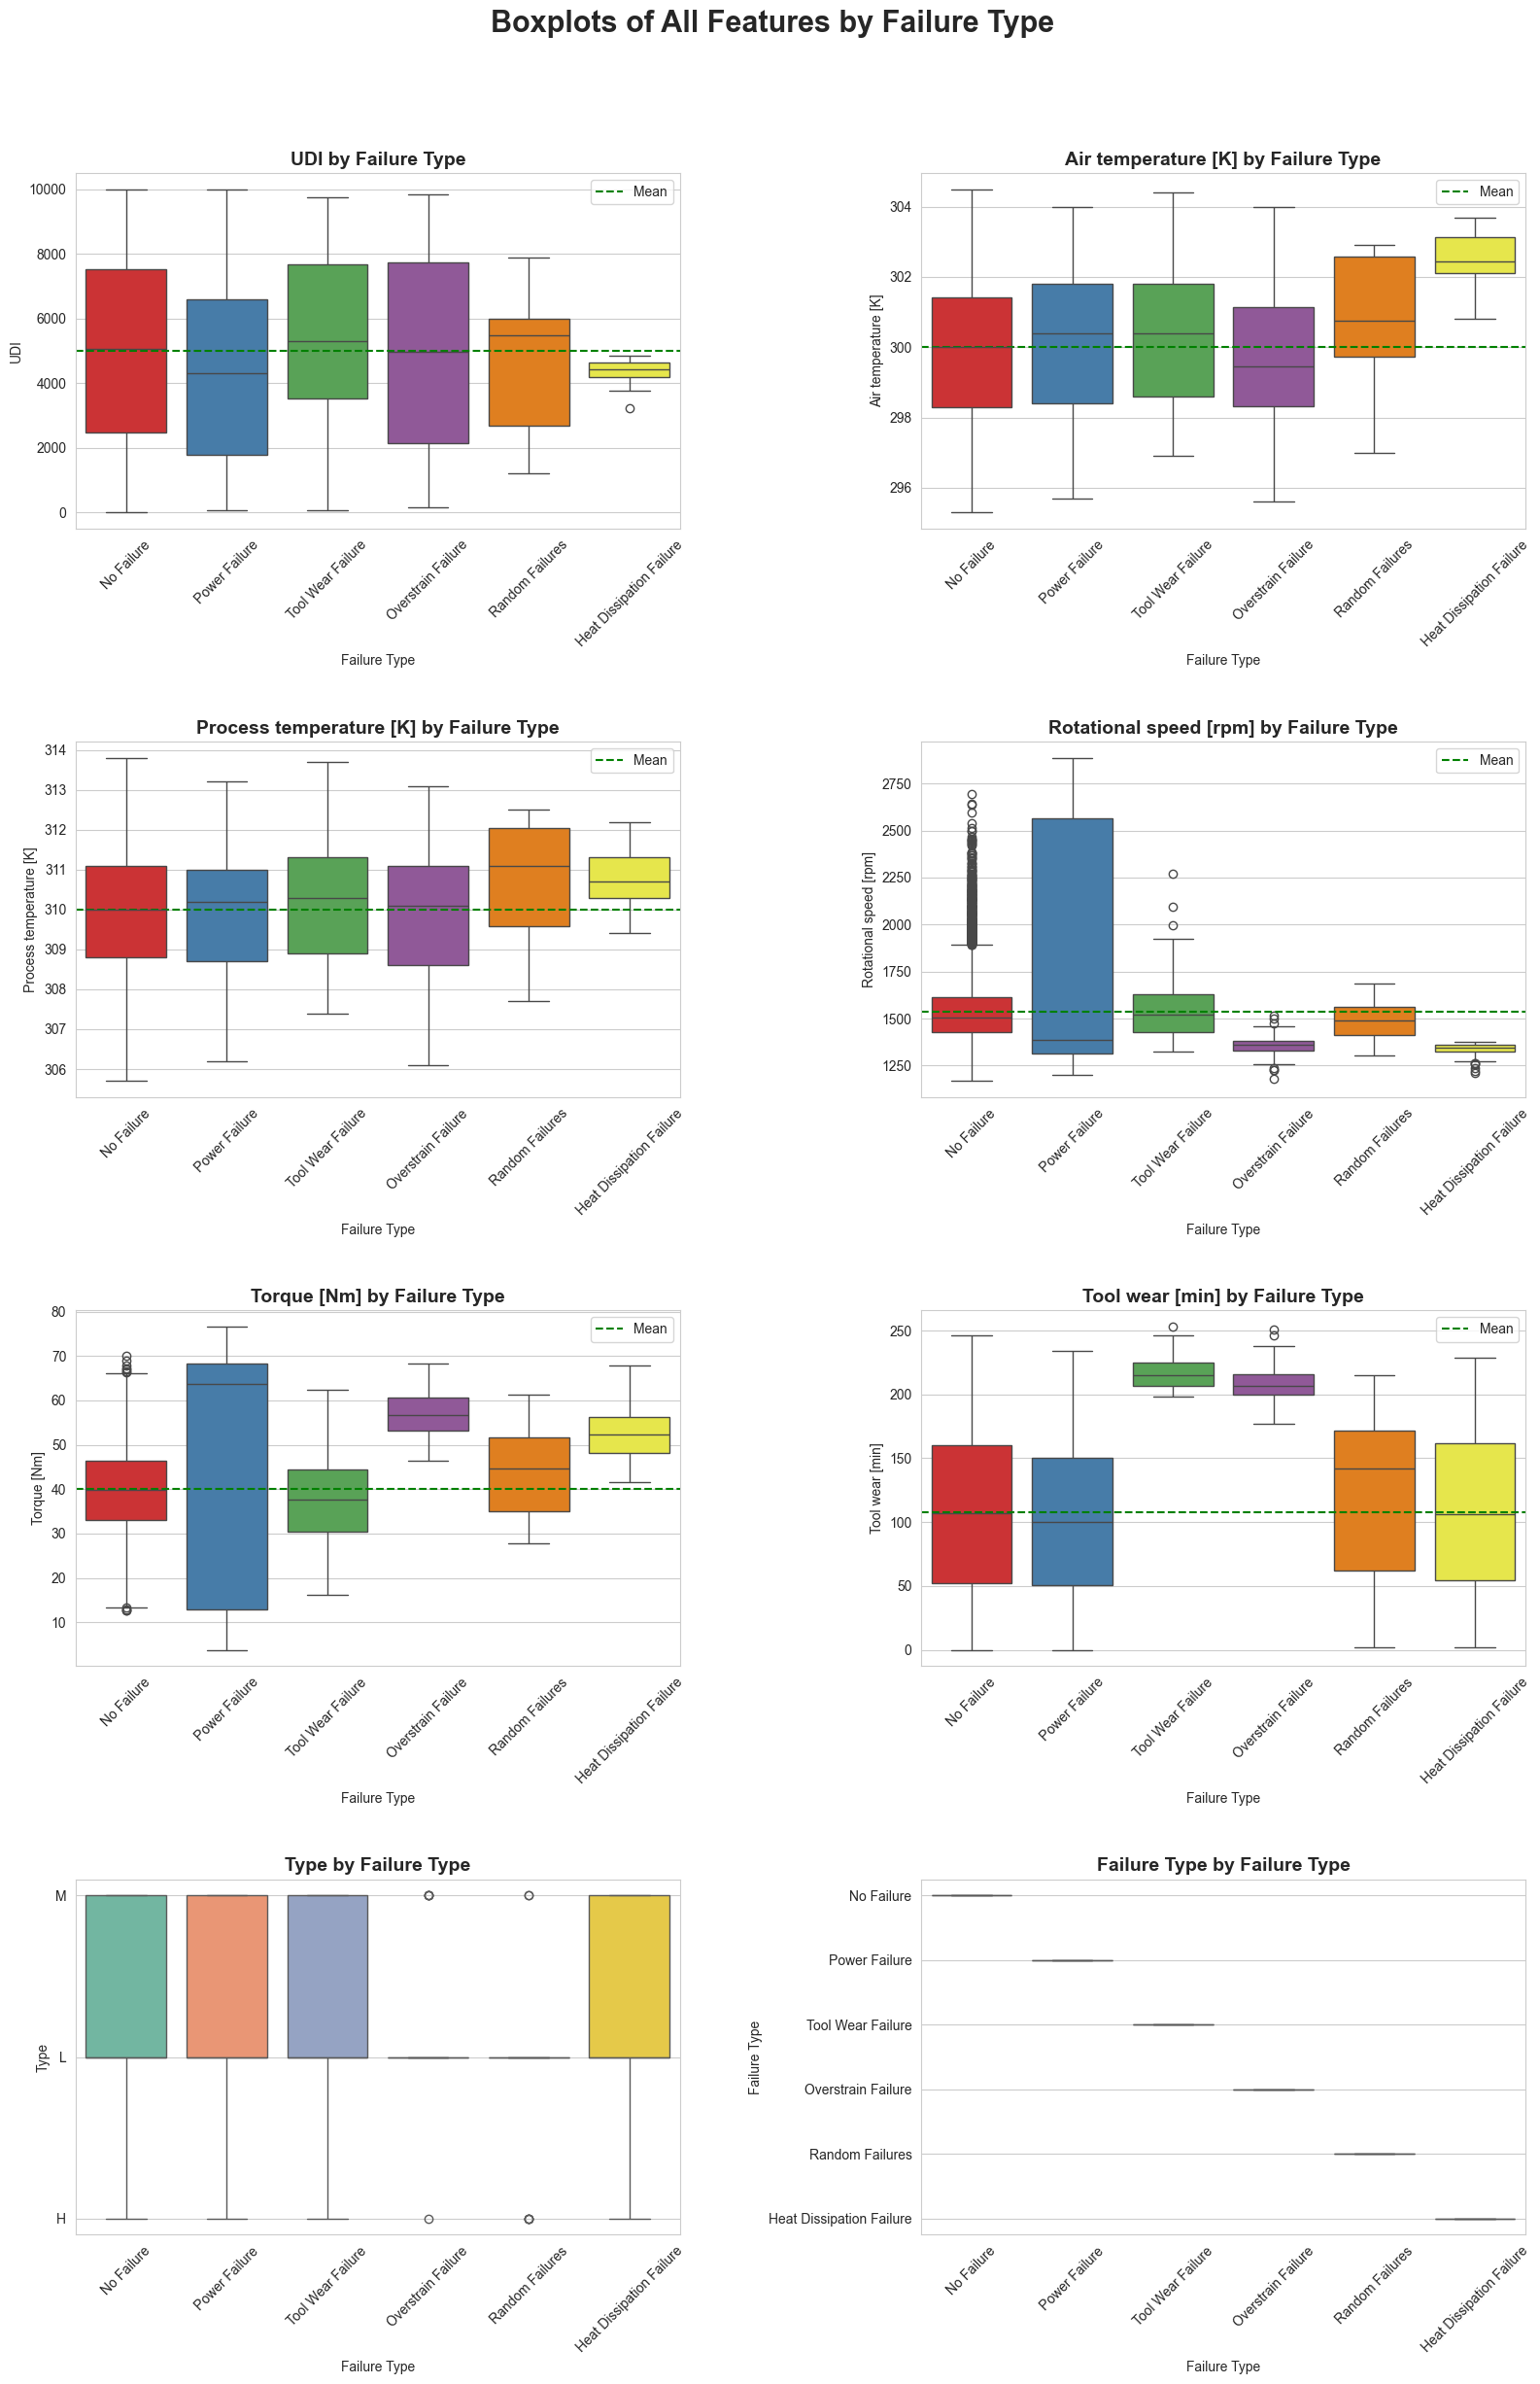

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Ensure Failure Type is string
df['Failure Type'] = df['Failure Type'].astype(str)

# Combine numerical and categorical features
all_features = continuous_features + categorical_features  # exclude ID columns

num_features = len(all_features)
cols = 2  # two plots per row
rows = math.ceil(num_features / cols)

fig, ax = plt.subplots(rows, cols, figsize=(16, 6*rows))  # slightly bigger figure
fig.suptitle("Boxplots of All Features by Failure Type", 
             fontsize=22, fontweight='bold', ha='center', y=1.02)

for i, feature in enumerate(all_features):
    row_idx = i // cols
    col_idx = i % cols
    
    # For categorical features, use horizontal boxplot
    if df[feature].dtype == 'object' or df[feature].nunique() < 10:
        sns.boxplot(data=df, x='Failure Type', y=feature, palette='Set2', ax=ax[row_idx, col_idx])
    else:  # numerical features
        sns.boxplot(data=df, x='Failure Type', y=feature, palette='Set1', ax=ax[row_idx, col_idx])
        ax[row_idx, col_idx].axhline(df[feature].mean(), color='green', linestyle='--', label='Mean')
        ax[row_idx, col_idx].legend()

    ax[row_idx, col_idx].set_title(f'{feature} by Failure Type', fontsize=14, fontweight='bold')
    ax[row_idx, col_idx].tick_params(axis='x', rotation=45)

# Remove empty subplots
if num_features % cols != 0:
    for j in range(num_features, rows*cols):
        fig.delaxes(ax.flatten()[j])

# Increase spacing between plots
plt.tight_layout()
plt.subplots_adjust(top=0.95, hspace=0.6, wspace=0.4)  # hspace: vertical, wspace: horizontal
plt.show()


### Checking the Outliers 

In [224]:
import pandas as pd

# Ensure continuous_features contains only numerical columns
iqr_values = {}

for col in continuous_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_values[col] = {'Q1': Q1, 'Q3': Q3, 'IQR': IQR,
                       'Lower Bound': Q1 - 1.5*IQR,
                       'Upper Bound': Q3 + 1.5*IQR}

# Convert to DataFrame for readability
iqr_df = pd.DataFrame(iqr_values).T
iqr_df


Q1       Q3     IQR  Lower Bound  Upper Bound
UDI                      2500.75  7500.25  4999.5     -4998.50     14999.50
Air temperature [K]       298.30   301.50     3.2       293.50       306.30
Process temperature [K]   308.80   311.10     2.3       305.35       314.55
Rotational speed [rpm]   1423.00  1612.00   189.0      1139.50      1895.50
Torque [Nm]                33.20    46.80    13.6        12.80        67.20
Tool wear [min]            53.00   162.00   109.0      -110.50       325.50

In [225]:
outlier_counts = {}

for col in continuous_features:
    Q1 = iqr_df.loc[col, 'Q1']
    Q3 = iqr_df.loc[col, 'Q3']
    IQR = iqr_df.loc[col, 'IQR']
    lower = iqr_df.loc[col, 'Lower Bound']
    upper = iqr_df.loc[col, 'Upper Bound']
    
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_counts[col] = len(outliers)

# Convert to DataFrame for readability
outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['Outlier Count'])
outlier_df


Outlier Count
UDI                                  0
Air temperature [K]                  0
Process temperature [K]              0
Rotational speed [rpm]             418
Torque [Nm]                         69
Tool wear [min]                      0

### Removing the Outliers

In [226]:
# Numerical columns
num_cols = ['Air temperature [K]', 'Process temperature [K]', 
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Create a copy of the dataframe to remove outliers
df_no_outliers = df.copy()

for col in num_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter rows within bounds
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & 
                                    (df_no_outliers[col] <= upper_bound)]

print(f"Original df shape: {df.shape}")
print(f"After removing outliers: {df_no_outliers.shape}")


Original df shape: (10000, 10)
After removing outliers: (9535, 10)


### To Standardise the Dataset Usig the Min max scaler 

In [227]:
from sklearn.preprocessing import MinMaxScaler

# Numerical columns to scale
num_cols = ['Air temperature [K]', 'Process temperature [K]', 
            'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data, and store back in the same columns
df[num_cols] = scaler.fit_transform(df[num_cols])

In [228]:
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M             0.304348                 0.358025   
1    2     L47181    L             0.315217                 0.370370   
2    3     L47182    L             0.304348                 0.345679   
3    4     L47183    L             0.315217                 0.358025   
4    5     L47184    L             0.315217                 0.370370   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                0.222934     0.535714         0.000000       0   No Failure  
1                0.139697     0.583791         0.011858       0   No Failure  
2                0.192084     0.626374         0.019763       0   No Failure  
3                0.154249     0.490385         0.027668       0   No Failure  
4                0.139697     0.497253         0.035573       0   No Failure

### Saving the file name as the preprocessed dataset

In [ ]:

df.to_csv('preprocessed_df.csv', index=False)